In [1]:
!git clone https://github.com/PhonePe/pulse.git


Cloning into 'pulse'...
Updating files:  15% (1375/9029)
Updating files:  16% (1445/9029)
Updating files:  17% (1535/9029)
Updating files:  18% (1626/9029)
Updating files:  19% (1716/9029)
Updating files:  20% (1806/9029)
Updating files:  21% (1897/9029)
Updating files:  22% (1987/9029)
Updating files:  23% (2077/9029)
Updating files:  24% (2167/9029)
Updating files:  25% (2258/9029)
Updating files:  26% (2348/9029)
Updating files:  27% (2438/9029)
Updating files:  28% (2529/9029)
Updating files:  29% (2619/9029)
Updating files:  29% (2639/9029)
Updating files:  30% (2709/9029)
Updating files:  31% (2799/9029)
Updating files:  32% (2890/9029)
Updating files:  33% (2980/9029)
Updating files:  34% (3070/9029)
Updating files:  35% (3161/9029)
Updating files:  35% (3233/9029)
Updating files:  36% (3251/9029)
Updating files:  37% (3341/9029)
Updating files:  38% (3432/9029)
Updating files:  39% (3522/9029)
Updating files:  40% (3612/9029)
Updating files:  41% (3702/9029)
Updating files:  42

## Aggregated - Transaction_csv

In [74]:
import os
import json
import pandas as pd

def extract_aggregated_transaction(base_path):
    data = []

    for state in os.listdir(base_path):
        state_path = os.path.join(base_path, state)
        for year in os.listdir(state_path):
            year_path = os.path.join(state_path, year)
            for quarter_file in os.listdir(year_path):
                file_path = os.path.join(year_path, quarter_file)
                with open(file_path, 'r') as f:
                    content = json.load(f)
                    try:
                        for item in content['data']['transactionData']:
                            data.append({
                                'state': state.replace('-',' ').title(),
                                'year': int(year),
                                'quarter': int(quarter_file.strip('.json')),
                                'transaction_type': item['name'],
                                'count': item['paymentInstruments'][0]['count'],
                                'amount': item['paymentInstruments'][0]['amount']
                            })
                    except:
                        pass  # For missing data

    df = pd.DataFrame(data)
    return df

# Run for Aggregated Transaction
path = r'C:\\DS_Upskill\\pulse\\data\\aggregated\\transaction\\country\\india\\state'

agg_transaction_df = extract_aggregated_transaction(path)
agg_transaction_df.to_csv('aggregated_transaction.csv', index=False)


In [75]:
agg_transaction_df.head(2)

,state,year,quarter,transaction_type,count,amount
0,Andaman & Nicobar Islands,2018,1,Recharge & bill payments,4200,1.845307e+06
1,Andaman & Nicobar Islands,2018,1,Peer-to-peer payments,1871,1.213866e+07


In [76]:
agg_transaction_df.dtypes

state                object
year                  int64
quarter               int64
transaction_type     object
count                 int64
amount              float64
dtype: object

In [77]:
agg_transaction_df.isnull().sum()

state               0
year                0
quarter             0
transaction_type    0
count               0
amount              0
dtype: int64

In [78]:
print(len(agg_transaction_df))

5034


In [2]:
import pandas as pd

In [3]:
agg_transaction_df = pd.read_csv('C:\\DS_Upskill\\Phone_pay\\aggregated_transaction.csv')

In [4]:
print(len(agg_transaction_df))

5034


In [26]:
agg_transaction_df['state'].unique()

array(['andaman-&-nicobar-islands', 'andhra-pradesh', 'arunachal-pradesh',
       'assam', 'bihar', 'chandigarh', 'chhattisgarh',
       'dadra-&-nagar-haveli-&-daman-&-diu', 'delhi', 'goa', 'gujarat',
       'haryana', 'himachal-pradesh', 'jammu-&-kashmir', 'jharkhand',
       'karnataka', 'kerala', 'ladakh', 'lakshadweep', 'madhya-pradesh',
       'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland',
       'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim',
       'tamil-nadu', 'telangana', 'tripura', 'uttar-pradesh',
       'uttarakhand', 'west-bengal'], dtype=object)

## Aggregated-Insurance_CSV

In [13]:
import json

# Pick any file that you know exists
test_file = r"C:\DS_Upskill\pulse\data\aggregated\insurance\country\india\state\maharashtra\2023\1.json"

with open(test_file, 'r', encoding='utf-8') as f:
    data = json.load(f)
    print(json.dumps(data, indent=2))  # Pretty print


{
  "success": true,
  "code": "SUCCESS",
  "data": {
    "from": 1672511400000,
    "to": 1679941800000,
    "transactionData": [
      {
        "name": "Insurance",
        "paymentInstruments": [
          {
            "type": "TOTAL",
            "count": 112174,
            "amount": 166596248.0
          }
        ]
      }
    ]
  },
  "responseTimestamp": 1692619165853
}


In [27]:
import os
import json
import pandas as pd

# Set your path to the insurance folder
base_path = r"C:\DS_Upskill\pulse\data\aggregated\insurance\country\india\state"

insurance_data = []

# Loop through all states
for state in os.listdir(base_path):
    state_path = os.path.join(base_path, state)
    if os.path.isdir(state_path):
        for year in os.listdir(state_path):
            year_path = os.path.join(state_path, year)
            for file in os.listdir(year_path):
                if file.endswith('.json'):
                    file_path = os.path.join(year_path, file)
                    try:
                        with open(file_path, 'r', encoding='utf-8') as f:
                            content = json.load(f)
                            txn_data = content.get('data', {}).get('transactionData', [])
                            
                            for txn in txn_data:
                                if txn.get('name') == 'Insurance':
                                    for pi in txn.get('paymentInstruments', []):
                                        insurance_data.append({
                                            'State': state.replace('-',' ').title(),
                                            'Year': int(year),
                                            'Quarter': int(file.strip('.json')),
                                            'Type': pi.get('type'),
                                            'Count': pi.get('count'),
                                            'Amount': pi.get('amount')
                                        })
                    except Exception as e:
                        print(f"Error in {file_path}: {e}")

# Convert to DataFrame
insurance_df = pd.DataFrame(insurance_data)

# Save to CSV
output_path = os.path.join(os.getcwd(), "aggregated_insurance.csv")
insurance_df.to_csv(output_path, index=False)

print(f"✅ Aggregated Insurance CSV saved with {len(insurance_df)} rows.")


✅ Aggregated Insurance CSV saved with 682 rows.


In [1]:
import pandas as pd

In [28]:
insurance_df =pd.read_csv('C:\\DS_Upskill\\Phone_pay\\aggregated_insurance.csv')
insurance_df.head()

,State,Year,Quarter,Type,Count,Amount
0,Andaman & Nicobar Islands,2020,2,TOTAL,6,1360.0
1,Andaman & Nicobar Islands,2020,3,TOTAL,41,15380.0
2,Andaman & Nicobar Islands,2020,4,TOTAL,124,157975.0
3,Andaman & Nicobar Islands,2021,1,TOTAL,225,244266.0
4,Andaman & Nicobar Islands,2021,2,TOTAL,137,181504.0


In [29]:
insurance_df.head()

,State,Year,Quarter,Type,Count,Amount
0,Andaman & Nicobar Islands,2020,2,TOTAL,6,1360.0
1,Andaman & Nicobar Islands,2020,3,TOTAL,41,15380.0
2,Andaman & Nicobar Islands,2020,4,TOTAL,124,157975.0
3,Andaman & Nicobar Islands,2021,1,TOTAL,225,244266.0
4,Andaman & Nicobar Islands,2021,2,TOTAL,137,181504.0


In [30]:
print(len(insurance_df))

682


In [31]:
insurance_df.dtypes

State       object
Year         int64
Quarter      int64
Type        object
Count        int64
Amount     float64
dtype: object

In [32]:
insurance_df.isnull().sum()

State      0
Year       0
Quarter    0
Type       0
Count      0
Amount     0
dtype: int64

In [35]:
insurance_df['Type'].unique()

array(['TOTAL'], dtype=object)

## Aggregated-User_csv

In [37]:
import json

# Pick any file that you know exists
test_file = r"C:\DS_Upskill\pulse\data\aggregated\user\country\india\state\maharashtra\2022\1.json"

with open(test_file, 'r', encoding='utf-8') as f:
    data = json.load(f)
    print(json.dumps(data, indent=2))  # Pretty print

{
  "success": true,
  "code": "SUCCESS",
  "data": {
    "aggregated": {
      "registeredUsers": 48227630,
      "appOpens": 2157769514
    },
    "usersByDevice": [
      {
        "brand": "Xiaomi",
        "count": 11340940,
        "percentage": 0.23515441252244823
      },
      {
        "brand": "Vivo",
        "count": 9873983,
        "percentage": 0.20473705633057232
      },
      {
        "brand": "Samsung",
        "count": 9447206,
        "percentage": 0.19588783442188637
      },
      {
        "brand": "Oppo",
        "count": 7009300,
        "percentage": 0.1453378488638152
      },
      {
        "brand": "Realme",
        "count": 3235912,
        "percentage": 0.06709664148953619
      },
      {
        "brand": "Apple",
        "count": 1510802,
        "percentage": 0.03132648235047005
      },
      {
        "brand": "OnePlus",
        "count": 1396866,
        "percentage": 0.028964019173241564
      },
      {
        "brand": "Motorola",
        "coun

In [11]:
import os
import json
import pandas as pd

# Path to the aggregated user JSONs
base_path = r"C:\\DS_Upskill\\pulse\data\\aggregated\\user\\country\\india\\state"

# List to hold final data
user_data = []

# Traverse folders
for state in os.listdir(base_path):
    state_path = os.path.join(base_path, state)
    if os.path.isdir(state_path):
        for year in os.listdir(state_path):
            year_path = os.path.join(state_path, year)
            for file in os.listdir(year_path):
                if file.endswith(".json"):
                    file_path = os.path.join(year_path, file)
                    try:
                        with open(file_path, "r", encoding='utf-8') as f:
                            data = json.load(f)

                            registered_users = data.get("data", {}).get("aggregated", {}).get("registeredUsers", 0)
                            app_opens = data.get("data", {}).get("aggregated", {}).get("appOpens", 0)
                            users_by_device = data.get("data", {}).get("usersByDevice", [])

                            for device in users_by_device:
                                user_data.append({
                                    "State": state.replace('-',' ').title(),
                                    "Year": int(year),
                                    "Quarter": int(file.strip(".json")),
                                    "Brand": device.get("brand"),
                                    "DeviceCount": device.get("count"),
                                    "DevicePercentage": device.get("percentage"),
                                    "RegisteredUsers": registered_users,
                                    "AppOpens": app_opens
                                })

                    except:
                        pass
                        

# Convert to DataFrame
agg_user_df = pd.DataFrame(user_data)

# Save to CSV
output_path = os.path.join(os.getcwd(), "aggregated_user.csv")
agg_user_df.to_csv(output_path, index=False)

print(f"Aggregated User CSV saved with {len(agg_user_df)} rows.")


Aggregated User CSV saved with 6732 rows.


In [2]:
agg_user_df.head()

,State,Year,Quarter,Brand,DeviceCount,DevicePercentage,RegisteredUsers,AppOpens
0,Andaman & Nicobar Islands,2018,1,Xiaomi,1665,0.247033,6740,0
1,Andaman & Nicobar Islands,2018,1,Samsung,1445,0.214392,6740,0
2,Andaman & Nicobar Islands,2018,1,Vivo,982,0.145697,6740,0
3,Andaman & Nicobar Islands,2018,1,Oppo,501,0.074332,6740,0
4,Andaman & Nicobar Islands,2018,1,OnePlus,332,0.049258,6740,0


In [3]:
agg_user_df= pd.read_csv('C:\\DS_Upskill\\Phone_pay\\aggregated_user.csv')
print(len(agg_user_df))

6732


In [6]:
agg_user_df.isnull().sum()

State               0
Year                0
Quarter             0
Brand               0
DeviceCount         0
DevicePercentage    0
RegisteredUsers     0
AppOpens            0
dtype: int64

In [7]:
agg_user_df.dtypes

State                object
Year                  int64
Quarter               int64
Brand                object
DeviceCount           int64
DevicePercentage    float64
RegisteredUsers       int64
AppOpens              int64
dtype: object

In [9]:
agg_user_df['Brand'].unique()

array(['Xiaomi', 'Samsung', 'Vivo', 'Oppo', 'OnePlus', 'Realme', 'Apple',
       'Motorola', 'Lenovo', 'Huawei', 'Others', 'Tecno', 'Gionee',
       'Infinix', 'Asus', 'Micromax', 'HMD Global', 'Lava', 'COOLPAD',
       'Lyf'], dtype=object)

In [10]:
agg_user_df.shape

(6732, 8)

## Map-User_CSV

In [14]:
import json

# Pick any file that you know exists
test_file = r"C:\DS_Upskill\pulse\data\map\user\hover\country\india\state\maharashtra\2022\1.json"

with open(test_file, 'r', encoding='utf-8') as f:
    data = json.load(f)
    print(json.dumps(data, indent=2))  # Pretty print

{
  "success": true,
  "code": "SUCCESS",
  "data": {
    "hoverData": {
      "jalgaon district": {
        "registeredUsers": 1156268,
        "appOpens": 72850684
      },
      "latur district": {
        "registeredUsers": 764670,
        "appOpens": 56012514
      },
      "thane district": {
        "registeredUsers": 5196050,
        "appOpens": 36680314
      },
      "bhandara district": {
        "registeredUsers": 317709,
        "appOpens": 17152369
      },
      "nandurbar district": {
        "registeredUsers": 266795,
        "appOpens": 27838113
      },
      "chandrapur district": {
        "registeredUsers": 570979,
        "appOpens": 46226115
      },
      "kolhapur district": {
        "registeredUsers": 1357916,
        "appOpens": 44102892
      },
      "solapur district": {
        "registeredUsers": 1565902,
        "appOpens": 178663433
      },
      "mumbai district": {
        "registeredUsers": 1873643,
        "appOpens": 6937597
      },
      "sind

In [3]:
import json

# Pick any file that you know exists
test_file = r"C:\DS_Upskill\pulse\data\map\user\hover\country\india\2022\1.json"

with open(test_file, 'r', encoding='utf-8') as f:
    data = json.load(f)
    print(json.dumps(data, indent=2))  # Pretty print

{
  "success": true,
  "code": "SUCCESS",
  "data": {
    "hoverData": {
      "puducherry": {
        "registeredUsers": 448051,
        "appOpens": 3938657
      },
      "tamil nadu": {
        "registeredUsers": 21667020,
        "appOpens": 638490275
      },
      "uttar pradesh": {
        "registeredUsers": 38999692,
        "appOpens": 836926025
      },
      "madhya pradesh": {
        "registeredUsers": 19656147,
        "appOpens": 1678266475
      },
      "andhra pradesh": {
        "registeredUsers": 23857951,
        "appOpens": 1254785973
      },
      "tripura": {
        "registeredUsers": 582124,
        "appOpens": 19322963
      },
      "lakshadweep": {
        "registeredUsers": 5990,
        "appOpens": 45410
      },
      "manipur": {
        "registeredUsers": 411900,
        "appOpens": 22637747
      },
      "maharashtra": {
        "registeredUsers": 48227630,
        "appOpens": 2157769514
      },
      "dadra & nagar haveli & daman & diu": {
       

In [1]:
import os
import json
import pandas as pd

# Base folder path for map user data
base_path = r"C:\\DS_Upskill\\pulse\data\\map\\user\\hover\\country\\india\\state"

# Empty list to store data
map_user_data = []

# Loop through states and years
for state in os.listdir(base_path):
    state_path = os.path.join(base_path, state)
    if os.path.isdir(state_path):
        for year in os.listdir(state_path):
            year_path = os.path.join(state_path, year)
            for file in os.listdir(year_path):
                if file.endswith(".json"):
                    file_path = os.path.join(year_path, file)
                    try:
                        with open(file_path, 'r', encoding='utf-8') as f:
                            data = json.load(f)

                        quarter = int(file.strip('.json'))

                        hover_data = data.get('data', {}).get('hoverData', {})
                        for district, values in hover_data.items():
                            map_user_data.append({
                                "State": state.replace("-", " ").title(),
                                "District": district.title(),
                                "Year": int(year),
                                "Quarter": quarter,
                                "RegisteredUsers": values.get("registeredUsers", 0),
                                "AppOpens": values.get("appOpens", 0)
                            })

                    except:
                        pass  # Skip problematic files silently

# Convert to DataFrame
map_user_df = pd.DataFrame(map_user_data)

# Save to CSV
output_path = os.path.join(os.getcwd(), "map_user.csv")
map_user_df.to_csv(output_path, index=False)

print(f" Map User CSV created with {len(map_user_df)} rows!")


 Map User CSV created with 20608 rows!


In [2]:
map_user_df.head()

,State,District,Year,Quarter,RegisteredUsers,AppOpens
0,Andaman & Nicobar Islands,North And Middle Andaman District,2018,1,632,0
1,Andaman & Nicobar Islands,South Andaman District,2018,1,5846,0
2,Andaman & Nicobar Islands,Nicobars District,2018,1,262,0
3,Andaman & Nicobar Islands,North And Middle Andaman District,2018,2,911,0
4,Andaman & Nicobar Islands,South Andaman District,2018,2,8143,0


In [3]:
map_user_df.isnull().sum()

State              0
District           0
Year               0
Quarter            0
RegisteredUsers    0
AppOpens           0
dtype: int64

In [4]:
map_user_df.shape

(20608, 6)

## Map-Transaction_CSV

In [5]:
import json

# Pick any file that you know exists
test_file = r"C:\DS_Upskill\pulse\data\map\transaction\hover\country\india\state\goa\2022\1.json"

with open(test_file, 'r', encoding='utf-8') as f:
    data = json.load(f)
    print(json.dumps(data, indent=2))  # Pretty print

{
  "success": true,
  "code": "SUCCESS",
  "data": {
    "hoverDataList": [
      {
        "name": "north goa district",
        "metric": [
          {
            "type": "TOTAL",
            "count": 8513573,
            "amount": 14075639843.882044
          }
        ]
      },
      {
        "name": "south goa district",
        "metric": [
          {
            "type": "TOTAL",
            "count": 3700525,
            "amount": 5740805558.964066
          }
        ]
      }
    ]
  },
  "responseTimestamp": 1651127622645
}


In [4]:
import json

# Pick any file that you know exists
test_file = r"C:\DS_Upskill\pulse\data\map\transaction\hover\country\india\2022\1.json"

with open(test_file, 'r', encoding='utf-8') as f:
    data = json.load(f)
    print(json.dumps(data, indent=2))  # Pretty print

{
  "success": true,
  "code": "SUCCESS",
  "data": {
    "hoverDataList": [
      {
        "name": "puducherry",
        "metric": [
          {
            "type": "TOTAL",
            "count": 7359176,
            "amount": 12083474905.386654
          }
        ]
      },
      {
        "name": "tamil nadu",
        "metric": [
          {
            "type": "TOTAL",
            "count": 294573150,
            "amount": 512789201600.61597
          }
        ]
      },
      {
        "name": "uttar pradesh",
        "metric": [
          {
            "type": "TOTAL",
            "count": 473953246,
            "amount": 883123174117.039
          }
        ]
      },
      {
        "name": "madhya pradesh",
        "metric": [
          {
            "type": "TOTAL",
            "count": 472703058,
            "amount": 747665139599.6421
          }
        ]
      },
      {
        "name": "andhra pradesh",
        "metric": [
          {
            "type": "TOTAL",
      

In [12]:
import os
import json
import pandas as pd

# Base path where your state folders are stored
base_path = r"C:\DS_Upskill\pulse\data\map\transaction\hover\country\india\state"

# Store all parsed rows
records = []

# Traverse through each state folder
for state in os.listdir(base_path):
    state_path = os.path.join(base_path, state)
    if os.path.isdir(state_path):
        for year in os.listdir(state_path):
            year_path = os.path.join(state_path, year)
            if os.path.isdir(year_path):
                for quarter_file in os.listdir(year_path):
                    if quarter_file.endswith(".json"):
                        quarter = quarter_file.replace(".json", "")
                        file_path = os.path.join(year_path, quarter_file)

                        with open(file_path, 'r') as f:
                            json_data = json.load(f)
                            hover_data_list = json_data.get("data", {}).get("hoverDataList", [])

                            for item in hover_data_list:
                                name = item.get("name", "")
                                metric = item.get("metric", [{}])[0]
                                count = metric.get("count", 0)
                                amount = metric.get("amount", 0)

                                records.append({
                                    "state": state.replace("-", " ").title(),
                                    "year": int(year),
                                    "quarter": int(quarter),
                                    "district": name,
                                    "transaction_count": count,
                                    "transaction_amount": amount
                                })

# Create a DataFrame and export
map_transaction = pd.DataFrame(records)
map_transaction.to_csv("map_transaction.csv", index=False)
print("map_transaction.csv created successfully!")


map_transaction.csv created successfully!


In [13]:
print(len(map_transaction))

20604


In [15]:
map_transaction.head()

,state,year,quarter,district,transaction_count,transaction_amount
0,Andaman & Nicobar Islands,2018,1,north and middle andaman district,442,9.316631e+05
1,Andaman & Nicobar Islands,2018,1,south andaman district,5688,1.256025e+07
2,Andaman & Nicobar Islands,2018,1,nicobars district,528,1.139849e+06
3,Andaman & Nicobar Islands,2018,2,north and middle andaman district,825,1.317863e+06
4,Andaman & Nicobar Islands,2018,2,south andaman district,9395,2.394824e+07


In [16]:
map_transaction.dtypes

state                  object
year                    int64
quarter                 int64
district               object
transaction_count       int64
transaction_amount    float64
dtype: object

## Map Insurance_csv

In [17]:
import json

# Pick any file that you know exists
test_file = r"C:\DS_Upskill\pulse\data\map\insurance\hover\country\india\state\goa\2022\1.json"

with open(test_file, 'r', encoding='utf-8') as f:
    data = json.load(f)
    print(json.dumps(data, indent=2))  # Pretty print

{
  "success": true,
  "code": "SUCCESS",
  "data": {
    "hoverDataList": [
      {
        "name": "north goa district",
        "metric": [
          {
            "type": "TOTAL",
            "count": 1369,
            "amount": 2131215.0
          }
        ]
      },
      {
        "name": "south goa district",
        "metric": [
          {
            "type": "TOTAL",
            "count": 1265,
            "amount": 1734030.0
          }
        ]
      }
    ]
  },
  "responseTimestamp": 1692611201231
}


In [5]:
import json

# Pick any file that you know exists
test_file = r"C:\DS_Upskill\pulse\data\map\insurance\hover\country\india\2022\1.json"

with open(test_file, 'r', encoding='utf-8') as f:
    data = json.load(f)
    print(json.dumps(data, indent=2))  # Pretty print

{
  "success": true,
  "code": "SUCCESS",
  "data": {
    "hoverDataList": [
      {
        "name": "puducherry",
        "metric": [
          {
            "type": "TOTAL",
            "count": 1199,
            "amount": 1663404.0
          }
        ]
      },
      {
        "name": "tamil nadu",
        "metric": [
          {
            "type": "TOTAL",
            "count": 47621,
            "amount": 64969045.0
          }
        ]
      },
      {
        "name": "uttar pradesh",
        "metric": [
          {
            "type": "TOTAL",
            "count": 45996,
            "amount": 73014969.0
          }
        ]
      },
      {
        "name": "madhya pradesh",
        "metric": [
          {
            "type": "TOTAL",
            "count": 13791,
            "amount": 19901462.0
          }
        ]
      },
      {
        "name": "andhra pradesh",
        "metric": [
          {
            "type": "TOTAL",
            "count": 29954,
            "amount": 4

In [18]:
import os
import json
import pandas as pd

# Path to the root directory containing all state folders
base_path = r"C:\\DS_Upskill\\pulse\\data\\map\\insurance\\hover\\country\\india\state"

# List to store all rows
records = []

# Traverse through each state directory
for state in os.listdir(base_path):
    state_path = os.path.join(base_path, state)
    if os.path.isdir(state_path):
        for year in os.listdir(state_path):
            year_path = os.path.join(state_path, year)
            if os.path.isdir(year_path):
                for quarter_file in os.listdir(year_path):
                    if quarter_file.endswith(".json"):
                        quarter = quarter_file.replace(".json", "")
                        file_path = os.path.join(year_path, quarter_file)

                        with open(file_path, 'r') as f:
                            json_data = json.load(f)
                            hover_data_list = json_data.get("data", {}).get("hoverDataList", [])

                            for item in hover_data_list:
                                name = item.get("name", "")
                                metric = item.get("metric", [{}])[0]
                                count = metric.get("count", 0)
                                amount = metric.get("amount", 0)

                                records.append({
                                    "state": state.replace("-", " ").title(),
                                    "year": int(year),
                                    "quarter": int(quarter),
                                    "district": name,
                                    "policy_count": count,
                                    "insured_amount": amount
                                })

# Convert to DataFrame and save as CSV
map_insurance = pd.DataFrame(records)
map_insurance.to_csv("map_insurance.csv", index=False)
print("map_insurance.csv created successfully!")


map_insurance.csv created successfully!


In [19]:
print(len(map_insurance))

13876


In [7]:
map_insurance = pd.read_csv('C:\\DS_Upskill\\Phone_pay\\map_insurance.csv')

In [8]:
map_insurance.head(2)

,state,year,quarter,district,policy_count,insured_amount
0,Andaman & Nicobar Islands,2020,2,south andaman district,3,795.0
1,Andaman & Nicobar Islands,2020,2,nicobars district,3,565.0


In [40]:
print(len(map_insurance))

13876


## Top User_csv

In [57]:
import json

# Pick any file that you know exists
test_file = r"C:\DS_Upskill\pulse\data\top\user\country\india\state\maharashtra\2022\1.json"

with open(test_file, 'r', encoding='utf-8') as f:
    data = json.load(f)
    print(json.dumps(data, indent=2))  # Pretty print

{
  "success": true,
  "code": "SUCCESS",
  "data": {
    "states": null,
    "districts": [
      {
        "name": "pune",
        "registeredUsers": 8331582
      },
      {
        "name": "thane",
        "registeredUsers": 5196050
      },
      {
        "name": "mumbai suburban",
        "registeredUsers": 5017556
      },
      {
        "name": "nashik",
        "registeredUsers": 2661739
      },
      {
        "name": "nagpur",
        "registeredUsers": 2286011
      },
      {
        "name": "aurangabad",
        "registeredUsers": 1894797
      },
      {
        "name": "mumbai",
        "registeredUsers": 1873643
      },
      {
        "name": "ahmednagar",
        "registeredUsers": 1749682
      },
      {
        "name": "palghar",
        "registeredUsers": 1601518
      },
      {
        "name": "solapur",
        "registeredUsers": 1565902
      }
    ],
    "pincodes": [
      {
        "name": "421302",
        "registeredUsers": 518716
      },
      {
  

In [1]:
import json

# Pick any file that you know exists
test_file = r"C:\DS_Upskill\pulse\data\top\user\country\india\2022\1.json"

with open(test_file, 'r', encoding='utf-8') as f:
    data = json.load(f)
    print(json.dumps(data, indent=2))  # Pretty print

{
  "success": true,
  "code": "SUCCESS",
  "data": {
    "states": [
      {
        "name": "maharashtra",
        "registeredUsers": 48227630
      },
      {
        "name": "uttar pradesh",
        "registeredUsers": 38999692
      },
      {
        "name": "karnataka",
        "registeredUsers": 31200349
      },
      {
        "name": "andhra pradesh",
        "registeredUsers": 23857951
      },
      {
        "name": "rajasthan",
        "registeredUsers": 23398857
      },
      {
        "name": "telangana",
        "registeredUsers": 22150612
      },
      {
        "name": "west bengal",
        "registeredUsers": 21919787
      },
      {
        "name": "tamil nadu",
        "registeredUsers": 21667020
      },
      {
        "name": "madhya pradesh",
        "registeredUsers": 19656147
      },
      {
        "name": "gujarat",
        "registeredUsers": 19265314
      }
    ],
    "districts": [
      {
        "name": "bengaluru urban",
        "registeredUsers"

In [49]:
import os
import json
import pandas as pd

def extract_all_top_user_data(base_dir):
    all_data = []

    # Loop through each state directory
    for state in os.listdir(base_dir):
        state_dir = os.path.join(base_dir, state)
        if not os.path.isdir(state_dir):
            continue

        for year in os.listdir(state_dir):
            year_dir = os.path.join(state_dir, year)
            for quarter_file in os.listdir(year_dir):
                if quarter_file.endswith(".json"):
                    quarter_path = os.path.join(year_dir, quarter_file)
                    quarter = int(os.path.splitext(quarter_file)[0])

                    try:
                        with open(quarter_path, 'r') as file:
                            data = json.load(file)

                        districts_data = data.get('data', {}).get('districts', [])
                        for district_entry in districts_data:
                            all_data.append({
                                "state": state.replace("-", " ").title(),
                                "year": int(year),
                                "quarter": quarter,
                                "district": district_entry.get("name", ""),
                                "registered_users": district_entry.get("registeredUsers", None)
                            })

                    except Exception as e:
                        print(f"Error processing file: {quarter_path}, Error: {e}")

    return pd.DataFrame(all_data)

# Set base path to your top-user directory
base_path = r"C:\DS_Upskill\pulse\data\top\user\country\india\state"

# Run batch extraction
top_user = extract_all_top_user_data(base_path)

# Save the full dataset to a CSV
output_csv = "top_user.csv"
top_user.to_csv(output_csv, index=False)

print(f"All Top-User data extracted and saved to {output_csv}")


All Top-User data extracted and saved to top_user.csv


In [55]:
top_user.head()

,state,year,quarter,district,registered_users
0,Andaman & Nicobar Islands,2018,1,south andaman,5846
1,Andaman & Nicobar Islands,2018,1,north and middle andaman,632
2,Andaman & Nicobar Islands,2018,1,nicobars,262
3,Andaman & Nicobar Islands,2018,2,south andaman,8143
4,Andaman & Nicobar Islands,2018,2,north and middle andaman,911


In [51]:
print(len(top_user))

8296


In [52]:
top_user.isnull().sum()

state               0
year                0
quarter             0
district            0
registered_users    0
dtype: int64

## Top Insurance_csv

In [58]:
import json

# Pick any file that you know exists
test_file = r"C:\DS_Upskill\pulse\data\top\insurance\country\india\state\maharashtra\2022\1.json"

with open(test_file, 'r', encoding='utf-8') as f:
    data = json.load(f)
    print(json.dumps(data, indent=2))  # Pretty print

{
  "success": true,
  "code": "SUCCESS",
  "data": {
    "states": null,
    "districts": [
      {
        "entityName": "pune",
        "metric": {
          "type": "TOTAL",
          "count": 17790,
          "amount": 24312875.0
        }
      },
      {
        "entityName": "thane",
        "metric": {
          "type": "TOTAL",
          "count": 14272,
          "amount": 16536659.0
        }
      },
      {
        "entityName": "mumbai suburban",
        "metric": {
          "type": "TOTAL",
          "count": 10457,
          "amount": 11756037.0
        }
      },
      {
        "entityName": "nagpur",
        "metric": {
          "type": "TOTAL",
          "count": 6568,
          "amount": 8328077.0
        }
      },
      {
        "entityName": "solapur",
        "metric": {
          "type": "TOTAL",
          "count": 4282,
          "amount": 5201915.0
        }
      },
      {
        "entityName": "mumbai",
        "metric": {
          "type": "TOTAL",
  

In [61]:
import os
import json
import pandas as pd

# Base directory where your top-insurance files are stored
base_path = r"C:\DS_Upskill\pulse\data\top\insurance\country\india\state"

# Initialize empty list to collect data
records = []

# Loop over all states, years, and quarters
for state in os.listdir(base_path):
    state_path = os.path.join(base_path, state)
    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)
        for quarter_file in os.listdir(year_path):
            if quarter_file.endswith('.json'):
                quarter = int(quarter_file.replace('.json', ''))
                file_path = os.path.join(year_path, quarter_file)
                
                with open(file_path, 'r', encoding='utf-8') as f:
                    data = json.load(f)

                # Extract district-level data
                districts_data = data.get('data', {}).get('districts', [])
                for item in districts_data:
                    district = item.get('entityName')
                    metric = item.get('metric', {})
                    count = metric.get('count')
                    amount = metric.get('amount')

                    records.append({
                        'state': state.replace("-", " ").title(),
                        'year': int(year),
                        'quarter': quarter,
                        'district': district,
                        'policy_count': count,
                        'insured_amount': amount
                    })

# Create DataFrame
top_insurance = pd.DataFrame(records)

# Save the full dataset to a CSV
output_csv = "top_insurance.csv"
top_insurance.to_csv(output_csv, index=False)

print(f"All Top-insurance data extracted and saved to {output_csv}")




All Top-insurance data extracted and saved to top_insurance.csv


In [62]:
top_insurance.head()

,state,year,quarter,district,policy_count,insured_amount
0,Andaman & Nicobar Islands,2020,2,nicobars,3,565.0
1,Andaman & Nicobar Islands,2020,2,south andaman,3,795.0
2,Andaman & Nicobar Islands,2020,3,south andaman,35,13651.0
3,Andaman & Nicobar Islands,2020,3,nicobars,5,1448.0
4,Andaman & Nicobar Islands,2020,3,north and middle andaman,1,281.0


In [68]:
print(len(top_insurance))

5608


In [63]:
top_insurance.isnull().sum()

state             0
year              0
quarter           0
district          0
policy_count      0
insured_amount    0
dtype: int64

## Top Transaction_csv

In [71]:
import json

# Pick any file that you know exists
test_file = r"C:\DS_Upskill\pulse\data\top\transaction\country\india\state\maharashtra\2022\1.json"

with open(test_file, 'r', encoding='utf-8') as f:
    data = json.load(f)
    print(json.dumps(data, indent=2))  # Pretty print

{
  "success": true,
  "code": "SUCCESS",
  "data": {
    "states": null,
    "districts": [
      {
        "entityName": "pune",
        "metric": {
          "type": "TOTAL",
          "count": 424149132,
          "amount": 508475101454.5797
        }
      },
      {
        "entityName": "mumbai suburban",
        "metric": {
          "type": "TOTAL",
          "count": 104595313,
          "amount": 148080835860.6061
        }
      },
      {
        "entityName": "washim",
        "metric": {
          "type": "TOTAL",
          "count": 73700274,
          "amount": 136398563399.82826
        }
      },
      {
        "entityName": "thane",
        "metric": {
          "type": "TOTAL",
          "count": 66420329,
          "amount": 91604299445.99771
        }
      },
      {
        "entityName": "nashik",
        "metric": {
          "type": "TOTAL",
          "count": 59914404,
          "amount": 89903593917.99501
        }
      },
      {
        "entityName": "au

In [2]:
import json

# Pick any file that you know exists
test_file = r"C:\DS_Upskill\pulse\data\top\transaction\country\india\2022\1.json"

with open(test_file, 'r', encoding='utf-8') as f:
    data = json.load(f)
    print(json.dumps(data, indent=2))  # Pretty print

{
  "success": true,
  "code": "SUCCESS",
  "data": {
    "states": [
      {
        "entityName": "maharashtra",
        "metric": {
          "type": "TOTAL",
          "count": 1169506438,
          "amount": 1681399273981.1611
        }
      },
      {
        "entityName": "karnataka",
        "metric": {
          "type": "TOTAL",
          "count": 1057855407,
          "amount": 1566649488305.8838
        }
      },
      {
        "entityName": "telangana",
        "metric": {
          "type": "TOTAL",
          "count": 886453385,
          "amount": 1670638169828.9993
        }
      },
      {
        "entityName": "andhra pradesh",
        "metric": {
          "type": "TOTAL",
          "count": 582603911,
          "amount": 1294320646554.8625
        }
      },
      {
        "entityName": "rajasthan",
        "metric": {
          "type": "TOTAL",
          "count": 564962220,
          "amount": 1022050180980.1362
        }
      },
      {
        "entityName": "

In [65]:
import os
import json
import pandas as pd

# Base directory for top-transaction data
base_path = r"C:\DS_Upskill\pulse\data\top\transaction\country\india\state"

# List to collect all records
records = []

# Loop over all states, years, and quarters
for state in os.listdir(base_path):
    state_path = os.path.join(base_path, state)
    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)
        for quarter_file in os.listdir(year_path):
            if quarter_file.endswith('.json'):
                quarter = int(quarter_file.replace('.json', ''))
                file_path = os.path.join(year_path, quarter_file)

                with open(file_path, 'r', encoding='utf-8') as f:
                    data = json.load(f)

                # Extract data from districts
                districts = data.get('data', {}).get('districts', [])
                for item in districts:
                    district = item.get('entityName')
                    metric = item.get('metric', {})
                    txn_count = metric.get('count')
                    txn_amount = metric.get('amount')

                    records.append({
                        'state': state.replace("-", " ").title(),
                        'year': int(year),
                        'quarter': quarter,
                        'district': district,
                        'transaction_count': txn_count,
                        'transaction_amount': txn_amount
                    })

# Convert to DataFrame
top_transaction = pd.DataFrame(records)

# Save the full dataset to a CSV
output_csv = "top_transaction.csv"
top_transaction.to_csv(output_csv, index=False)

print(f"All Top-transaction data extracted and saved to {output_csv}")




All Top-transaction data extracted and saved to top_transaction.csv


In [66]:
top_transaction.head()

,state,year,quarter,district,transaction_count,transaction_amount
0,Andaman & Nicobar Islands,2018,1,south andaman,5688,1.256025e+07
1,Andaman & Nicobar Islands,2018,1,nicobars,528,1.139849e+06
2,Andaman & Nicobar Islands,2018,1,north and middle andaman,442,9.316631e+05
3,Andaman & Nicobar Islands,2018,2,south andaman,9395,2.394824e+07
4,Andaman & Nicobar Islands,2018,2,nicobars,1120,3.072437e+06


In [67]:
print(len(top_transaction))

8296


In [69]:
top_transaction.dtypes

state                  object
year                    int64
quarter                 int64
district               object
transaction_count       int64
transaction_amount    float64
dtype: object

In [70]:
top_transaction.isnull().sum()

state                 0
year                  0
quarter               0
district              0
transaction_count     0
transaction_amount    0
dtype: int64

## MySQL Database Creation 

In [4]:
import pandas as pd
import mysql.connector
from mysql.connector import Error
import os
from sqlalchemy import create_engine
import pymysql

# Database connection parameters - update these with your actual credentials
DB_HOST = 'localhost'
DB_NAME = 'phonepe_transaction_insights'
DB_USER = 'root'
DB_PASS = '1234'

# Path to your CSV file
CSV_PATH = 'C:\\DS_Upskill\\Phone_pay\\aggregated_transaction.csv'

def create_database_connection():
    """Create a connection to MySQL and return the connection object"""
    try:
        connection = mysql.connector.connect(
            host=DB_HOST,
            user=DB_USER,
            password=DB_PASS
        )
        
        if connection.is_connected():
            print("Successfully connected to MySQL")
            return connection
    except Error as e:
        print(f"Error connecting to MySQL: {e}")
        return None

def create_database(connection):
    """Create the database if it doesn't exist"""
    try:
        cursor = connection.cursor()
        cursor.execute(f"CREATE DATABASE IF NOT EXISTS {DB_NAME}")
        print(f"Database '{DB_NAME}' created or already exists.")
        cursor.close()
    except Error as e:
        print(f"Error creating database: {e}")

def create_aggregated_transaction_table():
    """Create the aggregated_transaction table in the database"""
    try:
        connection = mysql.connector.connect(
            host=DB_HOST,
            user=DB_USER,
            password=DB_PASS,
            database=DB_NAME
        )
        cursor = connection.cursor()
        
        # Create aggregated_transaction table
        create_table_query = """
        CREATE TABLE IF NOT EXISTS aggregated_transaction (
            id INT AUTO_INCREMENT PRIMARY KEY,
            state VARCHAR(100),
            year INT,
            quarter INT,
            transaction_type VARCHAR(100),
            count BIGINT,
            amount DOUBLE,
            CONSTRAINT unique_transaction UNIQUE (state, year, quarter, transaction_type)
        )
        """
        cursor.execute(create_table_query)
        print("Table 'aggregated_transaction' created or already exists.")
        
        cursor.close()
        connection.close()
        
    except Error as e:
        print(f"Error creating table: {e}")

def import_aggregated_transaction_data():
    """Import data from the CSV file to the aggregated_transaction table"""
    try:
        # Create SQLAlchemy engine for pandas to use
        connection_string = f"mysql+pymysql://{DB_USER}:{DB_PASS}@{DB_HOST}/{DB_NAME}"
        engine = create_engine(connection_string)
        
        # Import data
        if os.path.exists(CSV_PATH):
            # Read the CSV file
            df = pd.read_csv(CSV_PATH)
            
            # Check if dataframe has the expected columns
            expected_columns = ['state', 'year', 'quarter', 'transaction_type', 'count', 'amount']
            missing_columns = [col for col in expected_columns if col not in df.columns]
            
            if missing_columns:
                print(f"Warning: CSV file is missing these columns: {missing_columns}")
                return
                
            # Import to database
            df.to_sql('aggregated_transaction', engine, if_exists='append', index=False)
            print(f"Data imported to 'aggregated_transaction' table. {len(df)} rows imported.")
        else:
            print(f"File not found: {CSV_PATH}")
        
    except Exception as e:
        print(f"Error importing data: {e}")

def main():
    """Main function to execute the database creation and data import"""
    print("Starting PhonePe data import process...")
    
    # Step 1: Connect to MySQL
    connection = create_database_connection()
    if not connection:
        print("Failed to connect to MySQL. Exiting.")
        return
        
    # Step 2: Create the database
    create_database(connection)
    connection.close()
    
    # Step 3: Create the aggregated_transaction table
    create_aggregated_transaction_table()
    
    # Step 4: Import data from CSV to the table
    import_aggregated_transaction_data()
    
    print("Aggregated transaction data import process completed.")

if __name__ == "__main__":
    main()

Starting PhonePe data import process...
Successfully connected to MySQL
Database 'phonepe_transaction_insights' created or already exists.
Table 'aggregated_transaction' created or already exists.
Data imported to 'aggregated_transaction' table. 5034 rows imported.
Aggregated transaction data import process completed.


In [33]:
import pandas as pd
import mysql.connector
from mysql.connector import Error
import os
from sqlalchemy import create_engine
import pymysql

# Database connection parameters - update these with your actual credentials
DB_HOST = 'localhost'
DB_NAME = 'phonepe_transaction_insights'  
DB_USER = 'root'
DB_PASS = '1234'

# Path to your CSV file
CSV_PATH = 'C:\\DS_Upskill\\Phone_pay\\aggregated_insurance.csv'

def create_aggregated_insurance_table():
    """Create the aggregated_insurance table in the database"""
    try:
        connection = mysql.connector.connect(
            host=DB_HOST,
            user=DB_USER,
            password=DB_PASS,
            database=DB_NAME
        )
        cursor = connection.cursor()
        
        # Create aggregated_insurance table
        create_table_query = """
        CREATE TABLE IF NOT EXISTS aggregated_insurance (
            id INT AUTO_INCREMENT PRIMARY KEY,
            state VARCHAR(100),
            year INT,
            quarter INT,
            type VARCHAR(100),
            count BIGINT,
            amount DOUBLE,
            CONSTRAINT unique_insurance UNIQUE (state, year, quarter, type)
        )
        """
        cursor.execute(create_table_query)
        print("Table 'aggregated_insurance' created or already exists.")
        
        cursor.close()
        connection.close()
        
    except Error as e:
        print(f"Error creating table: {e}")

def import_aggregated_insurance_data():
    """Import data from the CSV file to the aggregated_insurance table"""
    try:
        # Create SQLAlchemy engine for pandas to use
        connection_string = f"mysql+pymysql://{DB_USER}:{DB_PASS}@{DB_HOST}/{DB_NAME}"
        engine = create_engine(connection_string)
        
        # Import data
        df = pd.read_csv(CSV_PATH)
        
        # Clean column names if necessary - adjust these based on your actual CSV headers
        df.columns = ['state', 'year', 'quarter', 'type', 'count', 'amount']
        
        # Import to database
        df.to_sql('aggregated_insurance', engine, if_exists='append', index=False)
        print(f"Data imported to 'aggregated_insurance' table. {len(df)} rows imported.")
        
    except Exception as e:
        print(f"Error importing data: {e}")

def main():
    """Main function to execute the table creation and data import"""
    print("Starting aggregated_insurance data import process...")
    
    # Step 1: Create the aggregated_insurance table
    create_aggregated_insurance_table()
    
    # Step 2: Import data from CSV to the table
    import_aggregated_insurance_data()
    
    print("Aggregated insurance data import process completed.")

if __name__ == "__main__":
    main()

Starting aggregated_insurance data import process...
Table 'aggregated_insurance' created or already exists.
Data imported to 'aggregated_insurance' table. 682 rows imported.
Aggregated insurance data import process completed.


In [1]:
import pandas as pd
import mysql.connector
from mysql.connector import Error
import os
from sqlalchemy import create_engine
import pymysql

In [2]:

# Database connection parameters - update these with your actual credentials
DB_HOST = 'localhost'
DB_NAME = 'phonepe_transaction_insights'  # Using the same DB name from your previous success
DB_USER = 'root'
DB_PASS = '1234'

# Path to your CSV file
CSV_PATH = 'C:\\DS_Upskill\\Phone_pay\\aggregated_user.csv'

def create_aggregated_user_table():
    """Create the aggregated_user table in the database"""
    try:
        connection = mysql.connector.connect(
            host=DB_HOST,
            user=DB_USER,
            password=DB_PASS,
            database=DB_NAME
        )
        cursor = connection.cursor()
        
        # Create aggregated_user table
        create_table_query = """
        CREATE TABLE IF NOT EXISTS aggregated_user (
            id INT AUTO_INCREMENT PRIMARY KEY,
            state VARCHAR(100),
            year INT,
            quarter INT,
            brand VARCHAR(100),
            device_count BIGINT,
            device_percentage FLOAT,
            registered_users BIGINT,
            app_opens BIGINT,
            CONSTRAINT unique_user UNIQUE (state, year, quarter, brand)
        )
        """
        cursor.execute(create_table_query)
        print("Table 'aggregated_user' created or already exists.")
        
        cursor.close()
        connection.close()
        
    except Error as e:
        print(f"Error creating table: {e}")

def import_aggregated_user_data():
    """Import data from the CSV file to the aggregated_user table"""
    try:
        # Create SQLAlchemy engine for pandas to use
        connection_string = f"mysql+pymysql://{DB_USER}:{DB_PASS}@{DB_HOST}/{DB_NAME}"
        engine = create_engine(connection_string)
        
        # Import data
        df = pd.read_csv(CSV_PATH)
        
        # Clean column names if necessary - adjust these based on your actual CSV headers
        df.columns = ['state', 'year', 'quarter', 'brand', 'device_count', 'device_percentage', 'registered_users', 'app_opens']
        
        # Import to database
        df.to_sql('aggregated_user', engine, if_exists='append', index=False)
        print(f"Data imported to 'aggregated_user' table. {len(df)} rows imported.")
        
    except Exception as e:
        print(f"Error importing data: {e}")

def main():
    """Main function to execute the table creation and data import"""
    print("Starting aggregated_user data import process...")
    
    # Step 1: Create the aggregated_user table
    create_aggregated_user_table()
    
    # Step 2: Import data from CSV to the table
    import_aggregated_user_data()
    
    print("Aggregated user data import process completed.")

if __name__ == "__main__":
    main()

Starting aggregated_user data import process...
Table 'aggregated_user' created or already exists.
Data imported to 'aggregated_user' table. 6732 rows imported.
Aggregated user data import process completed.


In [2]:
# Database connection parameters - update these with your actual credentials
DB_HOST = 'localhost'
DB_NAME = 'phonepe_transaction_insights'  
DB_USER = 'root'
DB_PASS = '1234'

# Path to your CSV file
CSV_PATH = 'C:\\DS_Upskill\\Phone_pay\\map_user.csv'

def create_map_user_table():
    """Create the map_user table in the database"""
    try:
        connection = mysql.connector.connect(
            host=DB_HOST,
            user=DB_USER,
            password=DB_PASS,
            database=DB_NAME
        )
        cursor = connection.cursor()
        
        # Create map_user table
        create_table_query = """
        CREATE TABLE IF NOT EXISTS map_user (
            id INT AUTO_INCREMENT PRIMARY KEY,
            state VARCHAR(100),
            district VARCHAR(100),
            year INT,
            quarter INT,
            registered_users BIGINT,
            app_opens BIGINT,
            CONSTRAINT unique_map_user UNIQUE (state, district, year, quarter)
        )
        """
        cursor.execute(create_table_query)
        print("Table 'map_user' created or already exists.")
        
        cursor.close()
        connection.close()
        
    except Error as e:
        print(f"Error creating table: {e}")

def import_map_user_data():
    """Import data from the CSV file to the map_user table"""
    try:
        # Create SQLAlchemy engine for pandas to use
        connection_string = f"mysql+pymysql://{DB_USER}:{DB_PASS}@{DB_HOST}/{DB_NAME}"
        engine = create_engine(connection_string)
        
        # Import data
        df = pd.read_csv(CSV_PATH)
        
        # Clean column names if necessary - adjust these based on your actual CSV headers
        df.columns = ['state', 'district', 'year', 'quarter', 'registered_users', 'app_opens']
        
        # Import to database
        df.to_sql('map_user', engine, if_exists='append', index=False)
        print(f"Data imported to 'map_user' table. {len(df)} rows imported.")
        
    except Exception as e:
        print(f"Error importing data: {e}")

def main():
    """Main function to execute the table creation and data import"""
    print("Starting map_user data import process...")
    
    # Step 1: Create the map_user table
    create_map_user_table()
    
    # Step 2: Import data from CSV to the table
    import_map_user_data()
    
    print("Map user data import process completed.")

if __name__ == "__main__":
    main()

Starting map_user data import process...
Table 'map_user' created or already exists.
Data imported to 'map_user' table. 20608 rows imported.
Map user data import process completed.


In [13]:
# Database connection parameters 
DB_HOST = 'localhost'
DB_NAME = 'phonepe_transaction_insights' 
DB_USER = 'root'
DB_PASS = '1234'

# Path to your CSV file
CSV_PATH = 'C:\\DS_Upskill\\Phonepe_csv\\map_transaction.csv'

def create_map_transaction_table():
    """Create the map_transaction table in the database"""
    try:
        connection = mysql.connector.connect(
            host=DB_HOST,
            user=DB_USER,
            password=DB_PASS,
            database=DB_NAME
        )
        cursor = connection.cursor()
        
        # Create map_transaction table
        create_table_query = """
        CREATE TABLE IF NOT EXISTS map_transaction (
            id INT AUTO_INCREMENT PRIMARY KEY,
            state VARCHAR(100),
            year INT,
            quarter INT,
            district VARCHAR(100),
            transaction_count BIGINT,
            transaction_amount DOUBLE,
            CONSTRAINT unique_map_transaction UNIQUE (state, year, quarter, district)
        )
        """
        cursor.execute(create_table_query)
        print("Table 'map_transaction' created or already exists.")
        
        cursor.close()
        connection.close()
        
    except Error as e:
        print(f"Error creating table: {e}")

def import_map_transaction_data():
    """Import data from the CSV file to the map_transaction table"""
    try:
        # Create SQLAlchemy engine for pandas to use
        connection_string = f"mysql+pymysql://{DB_USER}:{DB_PASS}@{DB_HOST}/{DB_NAME}"
        engine = create_engine(connection_string)
        
        # Import data
        df = pd.read_csv(CSV_PATH)
        
        # Clean column names if necessary - adjust these based on your actual CSV headers
        df.columns = ['state', 'year', 'quarter', 'district', 'transaction_count', 'transaction_amount']
        
        # Import to database
        df.to_sql('map_transaction', engine, if_exists='append', index=False)
        print(f"Data imported to 'map_transaction' table. {len(df)} rows imported.")
        
    except Exception as e:
        print(f"Error importing data: {e}")

def main():
    """Main function to execute the table creation and data import"""
    print("Starting map_transaction data import process...")
    
    # Step 1: Create the map_transaction table
    create_map_transaction_table()
    
    # Step 2: Import data from CSV to the table
    import_map_transaction_data()
    
    print("Map transaction data import process completed.")

if __name__ == "__main__":
    main()

Starting map_transaction data import process...
Table 'map_transaction' created or already exists.
Data imported to 'map_transaction' table. 20604 rows imported.
Map transaction data import process completed.


In [15]:
# Database connection parameters 
DB_HOST = 'localhost'
DB_NAME = 'phonepe_transaction_insights'  
DB_USER = 'root'
DB_PASS = '1234'

# Path to your CSV file
CSV_PATH = 'C:\\DS_Upskill\\Phone_pay\\map_insurance.csv'

def create_map_insurance_table():
    """Create the map_insurance table in the database"""
    try:
        connection = mysql.connector.connect(
            host=DB_HOST,
            user=DB_USER,
            password=DB_PASS,
            database=DB_NAME
        )
        cursor = connection.cursor()
        
        # Create map_insurance table
        create_table_query = """
        CREATE TABLE IF NOT EXISTS map_insurance (
            id INT AUTO_INCREMENT PRIMARY KEY,
            state VARCHAR(100),
            year INT,
            quarter INT,
            district VARCHAR(100),
            policy_count BIGINT,
            insured_amount DOUBLE,
            CONSTRAINT unique_map_insurance UNIQUE (state, year, quarter, district)
        )
        """
        cursor.execute(create_table_query)
        print("Table 'map_insurance' created or already exists.")
        
        cursor.close()
        connection.close()
        
    except Error as e:
        print(f"Error creating table: {e}")

def import_map_insurance_data():
    """Import data from the CSV file to the map_insurance table"""
    try:
        # Create SQLAlchemy engine for pandas to use
        connection_string = f"mysql+pymysql://{DB_USER}:{DB_PASS}@{DB_HOST}/{DB_NAME}"
        engine = create_engine(connection_string)
        
        # Import data
        df = pd.read_csv(CSV_PATH)
        
        # Clean column names if necessary - adjust these based on your actual CSV headers
        df.columns = ['state', 'year', 'quarter', 'district', 'policy_count', 'insured_amount']
        
        # Import to database
        df.to_sql('map_insurance', engine, if_exists='append', index=False)
        print(f"Data imported to 'map_insurance' table. {len(df)} rows imported.")
        
    except Exception as e:
        print(f"Error importing data: {e}")

def main():
    """Main function to execute the table creation and data import"""
    print("Starting map_insurance data import process...")
    
    # Step 1: Create the map_insurance table
    create_map_insurance_table()
    
    # Step 2: Import data from CSV to the table
    import_map_insurance_data()
    
    print("Map insurance data import process completed.")

if __name__ == "__main__":
    main()

Starting map_insurance data import process...
Table 'map_insurance' created or already exists.
Data imported to 'map_insurance' table. 13876 rows imported.
Map insurance data import process completed.


In [16]:
# Database connection parameters - update these with your actual credentials
DB_HOST = 'localhost'
DB_NAME = 'phonepe_transaction_insights'  # Using the same DB name from your previous success
DB_USER = 'root'
DB_PASS = '1234'

# Path to your CSV file
CSV_PATH = 'C:\\DS_Upskill\\Phonepe_csv\\top_user.csv'

def create_top_user_table():
    """Create the top_user table in the database"""
    try:
        connection = mysql.connector.connect(
            host=DB_HOST,
            user=DB_USER,
            password=DB_PASS,
            database=DB_NAME
        )
        cursor = connection.cursor()
        
        # Create top_user table
        create_table_query = """
        CREATE TABLE IF NOT EXISTS top_user (
            id INT AUTO_INCREMENT PRIMARY KEY,
            state VARCHAR(100),
            year INT,
            quarter INT,
            district VARCHAR(100),
            registered_users BIGINT,
            CONSTRAINT unique_top_user UNIQUE (state, year, quarter, district)
        )
        """
        cursor.execute(create_table_query)
        print("Table 'top_user' created or already exists.")
        
        cursor.close()
        connection.close()
        
    except Error as e:
        print(f"Error creating table: {e}")

def import_top_user_data():
    """Import data from the CSV file to the top_user table"""
    try:
        # Create SQLAlchemy engine for pandas to use
        connection_string = f"mysql+pymysql://{DB_USER}:{DB_PASS}@{DB_HOST}/{DB_NAME}"
        engine = create_engine(connection_string)
        
        # Import data
        df = pd.read_csv(CSV_PATH)
        
        # Clean column names if necessary - adjust these based on your actual CSV headers
        df.columns = ['state', 'year', 'quarter', 'district', 'registered_users']
        
        # Import to database
        df.to_sql('top_user', engine, if_exists='append', index=False)
        print(f"Data imported to 'top_user' table. {len(df)} rows imported.")
        
    except Exception as e:
        print(f"Error importing data: {e}")

def main():
    """Main function to execute the table creation and data import"""
    print("Starting top_user data import process...")
    
    # Step 1: Create the top_user table
    create_top_user_table()
    
    # Step 2: Import data from CSV to the table
    import_top_user_data()
    
    print("Top user data import process completed.")

if __name__ == "__main__":
    main()

Starting top_user data import process...
Table 'top_user' created or already exists.
Data imported to 'top_user' table. 8296 rows imported.
Top user data import process completed.


In [17]:
# Database connection parameters - update these with your actual credentials
DB_HOST = 'localhost'
DB_NAME = 'phonepe_transaction_insights'  # Using the same DB name from your previous success
DB_USER = 'root'
DB_PASS = '1234'

# Path to your CSV file
CSV_PATH = 'C:\\DS_Upskill\\Phonepe_csv\\top_insurance.csv'

def create_top_insurance_table():
    """Create the top_insurance table in the database"""
    try:
        connection = mysql.connector.connect(
            host=DB_HOST,
            user=DB_USER,
            password=DB_PASS,
            database=DB_NAME
        )
        cursor = connection.cursor()
        
        # Create top_insurance table
        create_table_query = """
        CREATE TABLE IF NOT EXISTS top_insurance (
            id INT AUTO_INCREMENT PRIMARY KEY,
            state VARCHAR(100),
            year INT,
            quarter INT,
            district VARCHAR(100),
            policy_count BIGINT,
            insured_amount DOUBLE,
            CONSTRAINT unique_top_insurance UNIQUE (state, year, quarter, district)
        )
        """
        cursor.execute(create_table_query)
        print("Table 'top_insurance' created or already exists.")
        
        cursor.close()
        connection.close()
        
    except Error as e:
        print(f"Error creating table: {e}")

def import_top_insurance_data():
    """Import data from the CSV file to the top_insurance table"""
    try:
        # Create SQLAlchemy engine for pandas to use
        connection_string = f"mysql+pymysql://{DB_USER}:{DB_PASS}@{DB_HOST}/{DB_NAME}"
        engine = create_engine(connection_string)
        
        # Import data
        df = pd.read_csv(CSV_PATH)
        
        # Clean column names if necessary - adjust these based on your actual CSV headers
        df.columns = ['state', 'year', 'quarter', 'district', 'policy_count', 'insured_amount']
        
        # Import to database
        df.to_sql('top_insurance', engine, if_exists='append', index=False)
        print(f"Data imported to 'top_insurance' table. {len(df)} rows imported.")
        
    except Exception as e:
        print(f"Error importing data: {e}")

def main():
    """Main function to execute the table creation and data import"""
    print("Starting top_insurance data import process...")
    
    # Step 1: Create the top_insurance table
    create_top_insurance_table()
    
    # Step 2: Import data from CSV to the table
    import_top_insurance_data()
    
    print("Top insurance data import process completed.")

if __name__ == "__main__":
    main()

Starting top_insurance data import process...
Table 'top_insurance' created or already exists.
Data imported to 'top_insurance' table. 5608 rows imported.
Top insurance data import process completed.


In [19]:
# Database connection parameters 
DB_HOST = 'localhost'
DB_NAME = 'phonepe_transaction_insights' 
DB_USER = 'root'
DB_PASS = '1234'

# Path to your CSV file
CSV_PATH = 'C:\\DS_Upskill\\Phonepe_csv\\top_transaction.csv'

def create_top_transaction_table():
    """Create the top_transaction table in the database"""
    try:
        connection = mysql.connector.connect(
            host=DB_HOST,
            user=DB_USER,
            password=DB_PASS,
            database=DB_NAME
        )
        cursor = connection.cursor()
        
        # Create top_transaction table
        create_table_query = """
        CREATE TABLE IF NOT EXISTS top_transaction (
            id INT AUTO_INCREMENT PRIMARY KEY,
            state VARCHAR(100),
            year INT,
            quarter INT,
            district VARCHAR(100),
            transaction_count BIGINT,
            transaction_amount DOUBLE,
            CONSTRAINT unique_top_transaction UNIQUE (state, year, quarter, district)
        )
        """
        cursor.execute(create_table_query)
        print("Table 'top_transaction' created or already exists.")
        
        cursor.close()
        connection.close()
        
    except Error as e:
        print(f"Error creating table: {e}")

def import_top_transaction_data():
    """Import data from the CSV file to the top_transaction table"""
    try:
        # Create SQLAlchemy engine for pandas to use
        connection_string = f"mysql+pymysql://{DB_USER}:{DB_PASS}@{DB_HOST}/{DB_NAME}"
        engine = create_engine(connection_string)
        
        # Import data
        df = pd.read_csv(CSV_PATH)
        
        # Clean column names if necessary - adjust these based on your actual CSV headers
        df.columns = ['state', 'year', 'quarter', 'district', 'transaction_count', 'transaction_amount']
        
        # Import to database
        df.to_sql('top_transaction', engine, if_exists='append', index=False)
        print(f"Data imported to 'top_transaction' table. {len(df)} rows imported.")
        
    except Exception as e:
        print(f"Error importing data: {e}")

def main():
    """Main function to execute the table creation and data import"""
    print("Starting top_transaction data import process...")
    
    # Step 1: Create the top_transaction table
    create_top_transaction_table()
    
    # Step 2: Import data from CSV to the table
    import_top_transaction_data()
    
    print("Top transaction data import process completed.")

if __name__ == "__main__":
    main()

Starting top_transaction data import process...
Table 'top_transaction' created or already exists.
Data imported to 'top_transaction' table. 8296 rows imported.
Top transaction data import process completed.


### 1. Decoding Transaction Dynamics on PhonePe

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [3]:
import mysql.connector
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import mysql.connector
import pandas as pd
from tabulate import tabulate

# Connect to MySQL Database
connection = mysql.connector.connect(
    host='localhost',       
    user='root',
    password='1234',
    database='phonepe_transaction_insights'
)

cursor = connection.cursor()


In [14]:
def run_query(query):
    df = pd.read_sql(query, connection)
    print(tabulate(df, headers='keys', tablefmt='psql'))
    return df

# 1. State-wise Transaction Trends
query = """
SELECT 
    state,
    year,
    quarter,
    SUM(count) AS total_transactions,
    SUM(amount) AS total_transaction_value
FROM 
    aggregated_transaction
GROUP BY 
    state, year, quarter
ORDER BY 
    state, year, quarter;

"""
df_result = run_query(query)


+------+------------------------------------+--------+-----------+----------------------+---------------------------+
|      | state                              |   year |   quarter |   total_transactions |   total_transaction_value |
|------+------------------------------------+--------+-----------+----------------------+---------------------------|
|    0 | Andaman & Nicobar Islands          |   2018 |         1 |       6658           |               1.46318e+07 |
|    1 | Andaman & Nicobar Islands          |   2018 |         2 |      11340           |               2.83385e+07 |
|    2 | Andaman & Nicobar Islands          |   2018 |         3 |      16265           |               5.55575e+07 |
|    3 | Andaman & Nicobar Islands          |   2018 |         4 |      23758           |               9.05483e+07 |
|    4 | Andaman & Nicobar Islands          |   2019 |         1 |      30486           |               1.023e+08   |
|    5 | Andaman & Nicobar Islands          |   2019 |  

➡️ Purpose: This gives a time series view — how each state grew every quarter.

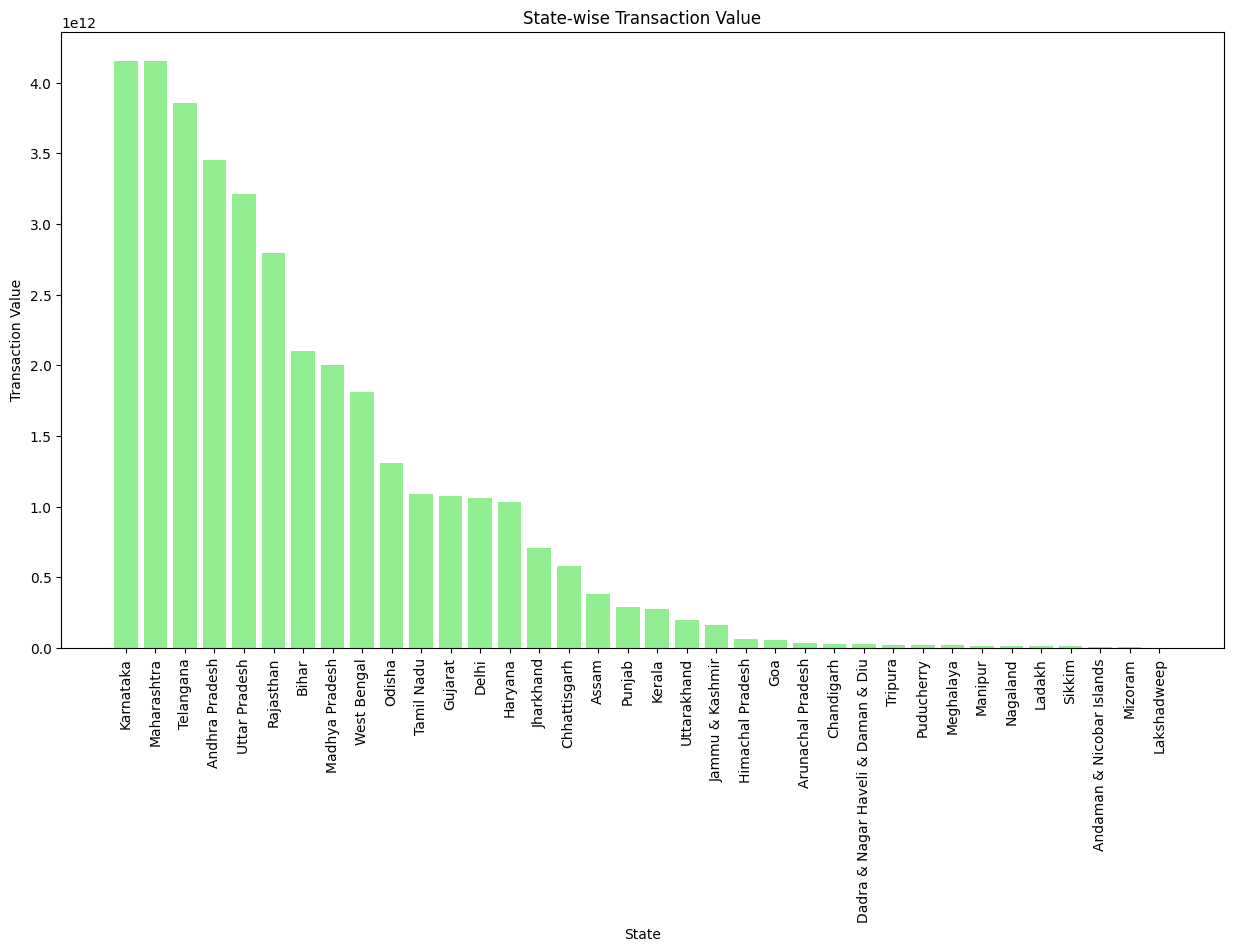

In [10]:
import matplotlib.pyplot as plt

# Sort all states (optional)
df_state_trends_sorted = df_result.sort_values(by='total_transaction_value', ascending=False)

# Plot
plt.figure(figsize=(15,8))
plt.bar(df_state_trends_sorted['state'], df_state_trends_sorted['total_transaction_value'], color='lightgreen')
plt.title('State-wise Transaction Value')
plt.xlabel('State')
plt.ylabel('Transaction Value')
plt.xticks(rotation=90)  # Rotate X-axis labels to avoid overlap
plt.show()


✅ Objective: Find top states by total transaction value or volume.

In [12]:
def run_query(query):
    df = pd.read_sql(query, connection)
    print(tabulate(df, headers='keys', tablefmt='psql'))
    return df

# 2. Quarter-wise Transaction Trends

query = """
SELECT 
    quarter,
    SUM(amount) AS total_value,
    SUM(count) AS total_count
FROM 
    aggregated_transaction
GROUP BY 
    quarter
ORDER BY 
    quarter ASC;

"""
df_result = run_query(query)


+----+-----------+---------------+---------------+
|    |   quarter |   total_value |   total_count |
|----+-----------+---------------+---------------|
|  0 |         1 |   7.33552e+13 |   4.78448e+10 |
|  1 |         2 |   8.20242e+13 |   5.466e+10   |
|  2 |         3 |   8.82331e+13 |   6.21412e+10 |
|  3 |         4 |   1.0191e+14  |   7.06383e+10 |
+----+-----------+---------------+---------------+


➡️ Purpose: See growth or decline over time.

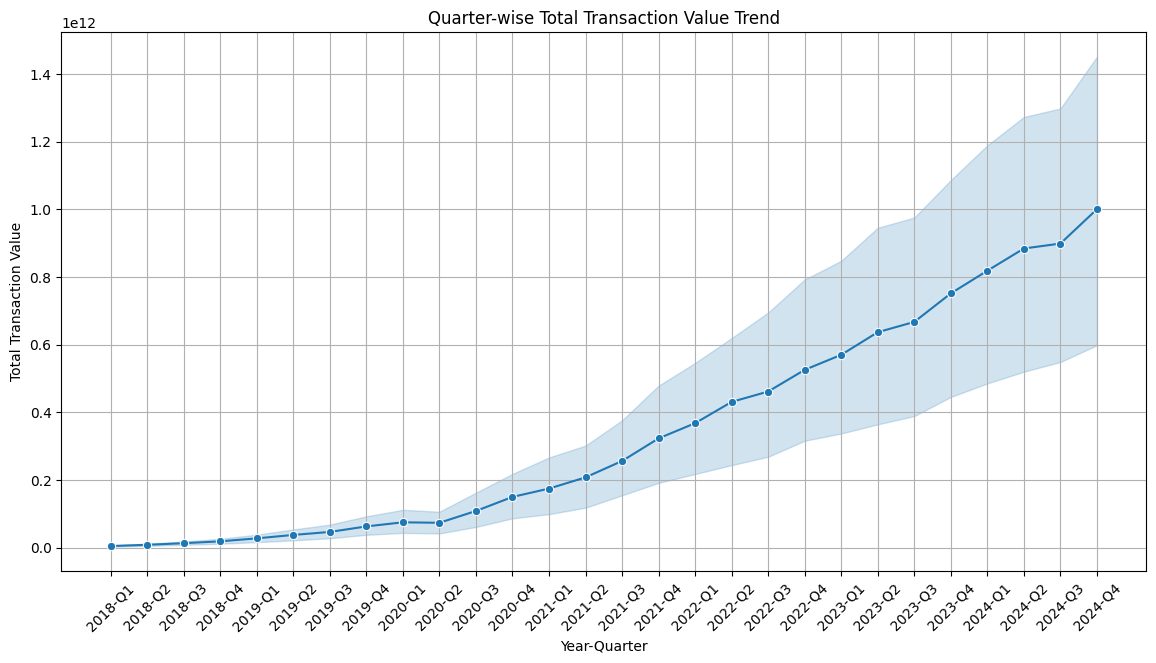

In [15]:
import seaborn as sns

# Assuming your dataframe is named df_quarter_trends
df_result['year_quarter'] = df_result['year'].astype(str) + '-Q' + df_result['quarter'].astype(str)

df_quarter_trends_sorted = df_result.sort_values(['year', 'quarter'])

plt.figure(figsize=(14,7))
sns.lineplot(x='year_quarter', y='total_transaction_value', data=df_quarter_trends_sorted, marker='o')
plt.title('Quarter-wise Total Transaction Value Trend')
plt.xlabel('Year-Quarter')
plt.ylabel('Total Transaction Value')
plt.xticks(rotation=45)
plt.grid()
plt.show()


✅ Objective: Understand overall growth or decline over quarters.

In [5]:
def run_query(query):
    df = pd.read_sql(query, connection)
    print(tabulate(df, headers='keys', tablefmt='psql'))
    return df

# 3. Payment Category-wise Trends

query = """
SELECT 
    transaction_type,
    SUM(amount) AS total_value,
    SUM(count) AS total_count
FROM 
    aggregated_transaction
GROUP BY 
    transaction_type
ORDER BY 
    total_value DESC;
"""
df_result = run_query(query)

+----+--------------------------+---------------+---------------+
|    | transaction_type         |   total_value |   total_count |
|----+--------------------------+---------------+---------------|
|  0 | Peer-to-peer payments    |   2.66527e+14 |   8.50324e+10 |
|  1 | Merchant payments        |   6.53399e+13 |   1.30239e+11 |
|  2 | Recharge & bill payments |   1.33388e+13 |   1.95968e+10 |
|  3 | Others                   |   1.74281e+11 |   2.6205e+08  |
|  4 | Financial Services       |   1.42019e+11 |   1.54209e+08 |
+----+--------------------------+---------------+---------------+


➡️ Purpose: Which payment categories (e.g., recharge, bills, shopping) are rising or falling?

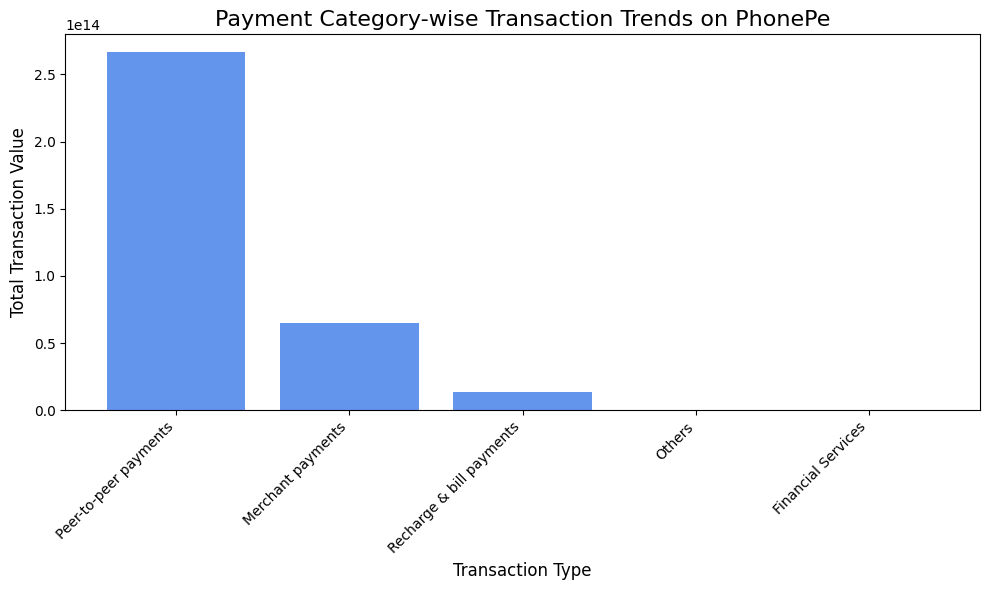

In [6]:
import matplotlib.pyplot as plt

# Sort the data if you want, optional
df_payment_category_sorted = df_result.sort_values(by='total_value', ascending=False)

# Create the plot
plt.figure(figsize=(10,6))
plt.bar(df_payment_category_sorted['transaction_type'], df_payment_category_sorted['total_value'], color='cornflowerblue')

# Add labels and title
plt.title('Payment Category-wise Transaction Trends on PhonePe', fontsize=16)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Total Transaction Value', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better reading
plt.tight_layout()
plt.show()


✅ Objective: See which payment categories are performing best (e.g., recharge, merchant payment, peer-to-peer).

In [ ]:
def run_query(query):
    df = pd.read_sql(query, connection)
    print(tabulate(df, headers='keys', tablefmt='psql'))
    return df

# 4. State + Quarter Combination Analysis

query = """
SELECT 
    state,
    year,
    quarter,
    SUM(amount) AS total_value,
    SUM(count) AS total_count
FROM 
    aggregated_transaction
GROUP BY 
    state, quarter,year
ORDER BY 
    state, quarter,year;

"""
df_result = run_query(query)

+------+------------------------------------+--------+-----------+---------------+------------------+
|      | state                              |   year |   quarter |   total_value |      total_count |
|------+------------------------------------+--------+-----------+---------------+------------------|
|    0 | Andaman & Nicobar Islands          |   2018 |         1 |   1.46318e+07 |   6658           |
|    1 | Andaman & Nicobar Islands          |   2019 |         1 |   1.023e+08   |  30486           |
|    2 | Andaman & Nicobar Islands          |   2020 |         1 |   1.61476e+08 |  41298           |
|    3 | Andaman & Nicobar Islands          |   2021 |         1 |   7.83707e+08 | 244752           |
|    4 | Andaman & Nicobar Islands          |   2022 |         1 |   2.12903e+09 | 794748           |
|    5 | Andaman & Nicobar Islands          |   2023 |         1 |   4.46153e+09 |      2.27639e+06 |
|    6 | Andaman & Nicobar Islands          |   2024 |         1 |   6.85915e+09 |

➡️ Purpose: See which states are growing/declining quarter-by-quarter.


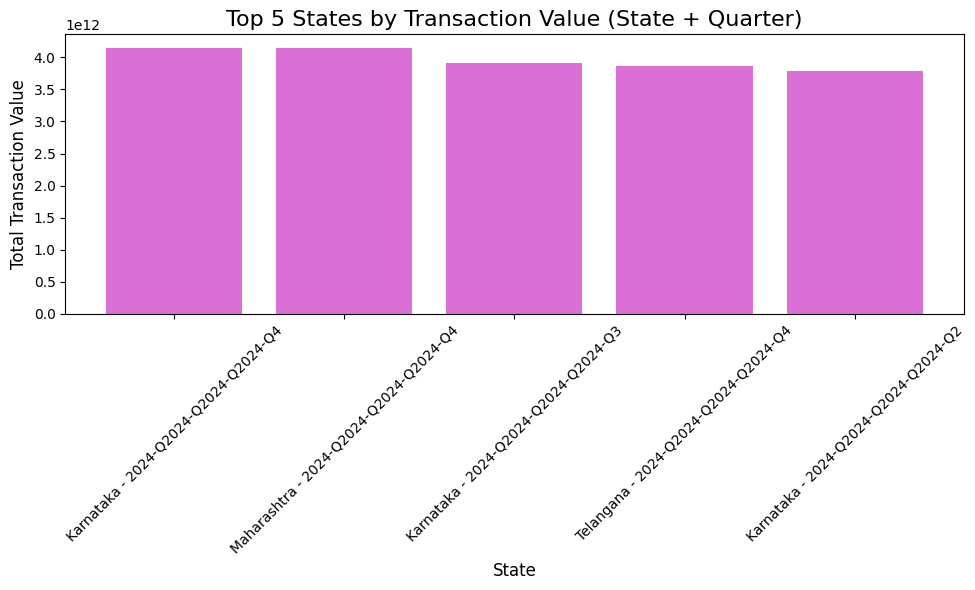

In [23]:
df_result ['state_quarter'] = df_result['state'] + " - " + df_result['quarter']

# Step 1: Sort by total_value in descending order
df_state_quarter_sorted = df_result.sort_values(by='total_value', ascending=False)

# Step 2: Select top 5
top5_states = df_state_quarter_sorted.head(5)

# Step 3: Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(top5_states['state_quarter'], top5_states['total_value'], color='orchid')
plt.title('Top 5 States by Transaction Value (State + Quarter)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Transaction Value', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


✅ Objective: Find how different states are performing quarter-by-quarter.

### 2. User Engagement and Growth Strategy

In [25]:
def run_query(query):
    df = pd.read_sql(query, connection)
    print(tabulate(df, headers='keys', tablefmt='psql'))
    return df

# 🔹 State-wise Total Registered Users and App Opens

query = """
SELECT 
    state,
    SUM(registered_users) AS total_registered_users,
    SUM(app_opens) AS total_app_opens
FROM 
    aggregated_user
GROUP BY 
    state
ORDER BY 
    total_registered_users DESC;

"""
df_result = run_query(query)

+----+------------------------------------+--------------------------+-------------------+
|    | state                              |   total_registered_users |   total_app_opens |
|----+------------------------------------+--------------------------+-------------------|
|  0 | maharashtra                        |              4.97283e+09 |       1.30903e+11 |
|  1 | uttar-pradesh                      |              3.91567e+09 |       7.21782e+10 |
|  2 | karnataka                          |              3.2051e+09  |       1.21506e+11 |
|  3 | andhra-pradesh                     |              2.47956e+09 |       1.02445e+11 |
|  4 | rajasthan                          |              2.3721e+09  |       1.00093e+11 |
|  5 | telangana                          |              2.33099e+09 |       9.26399e+10 |
|  6 | west-bengal                        |              2.26743e+09 |       3.41392e+10 |
|  7 | tamil-nadu                         |              2.13032e+09 |       3.95785e+10 |

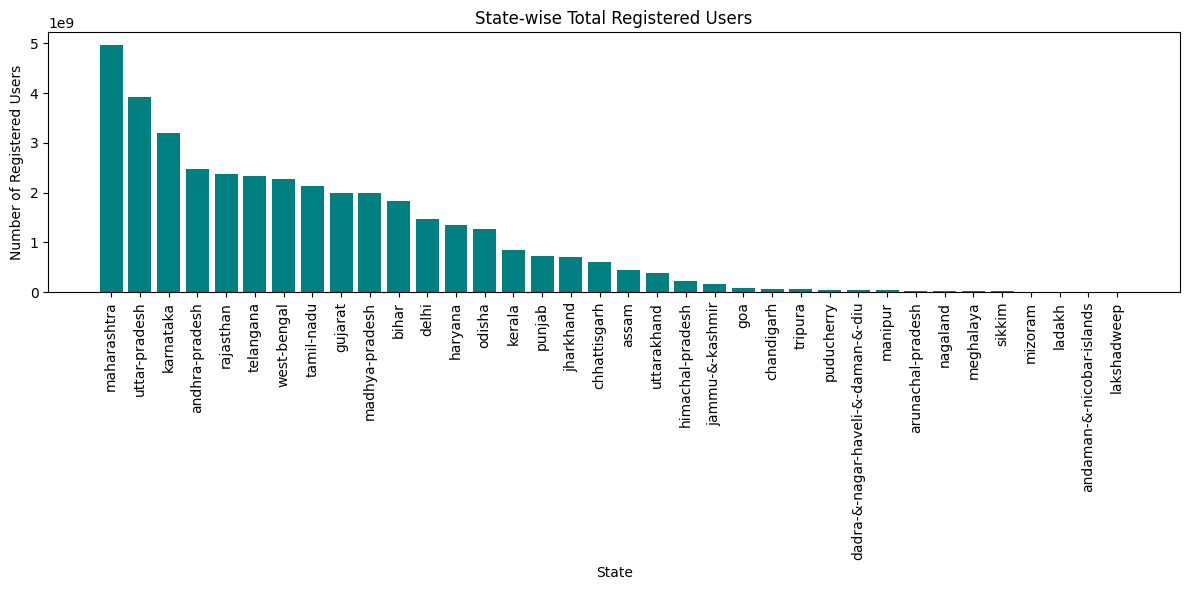

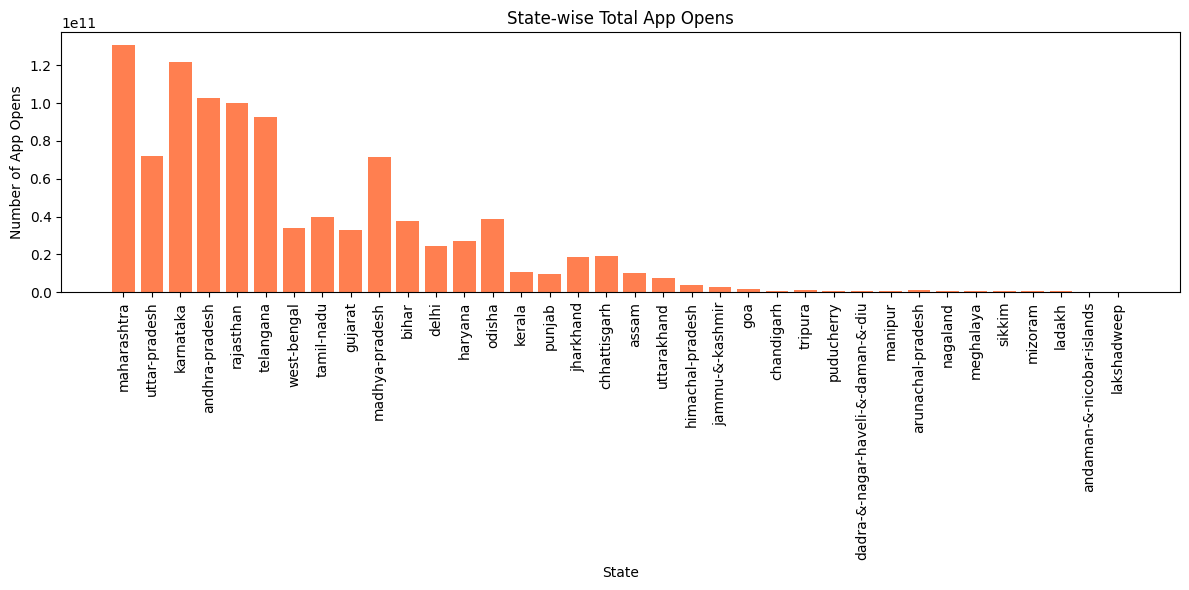

In [26]:
import matplotlib.pyplot as plt


# Plot Registered Users
plt.figure(figsize=(12,6))
plt.bar(df_result['state'], df_result['total_registered_users'], color='teal')
plt.title('State-wise Total Registered Users')
plt.xlabel('State')
plt.ylabel('Number of Registered Users')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot App Opens
plt.figure(figsize=(12,6))
plt.bar(df_result['state'], df_result['total_app_opens'], color='coral')
plt.title('State-wise Total App Opens')
plt.xlabel('State')
plt.ylabel('Number of App Opens')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


✅ Business Insight:

“States like Maharashtra, Uttar Pradesh, and Karnataka have the highest number of registered users and app opens, indicating strong engagement. Lower-performing states could be targeted for marketing campaigns.”

In [27]:
def run_query(query):
    df = pd.read_sql(query, connection)
    print(tabulate(df, headers='keys', tablefmt='psql'))
    return df

# 🔹 District-wise Total Registered Users

query = """
SELECT 
    state,
    district,
    SUM(registered_users) AS total_registered_users
FROM 
    map_user
GROUP BY 
    state, district
ORDER BY 
    total_registered_users DESC;

"""
df_result = run_query(query)

+-----+------------------------------------+------------------------------------------+--------------------------+
|     | state                              | district                                 |   total_registered_users |
|-----+------------------------------------+------------------------------------------+--------------------------|
|   0 | karnataka                          | Bengaluru Urban District                 |              3.03663e+08 |
|   1 | maharashtra                        | Pune District                            |              1.99346e+08 |
|   2 | maharashtra                        | Thane District                           |              1.22502e+08 |
|   3 | rajasthan                          | Jaipur District                          |              1.19739e+08 |
|   4 | maharashtra                        | Mumbai Suburban District                 |              1.19013e+08 |
|   5 | telangana                          | Hyderabad District                 

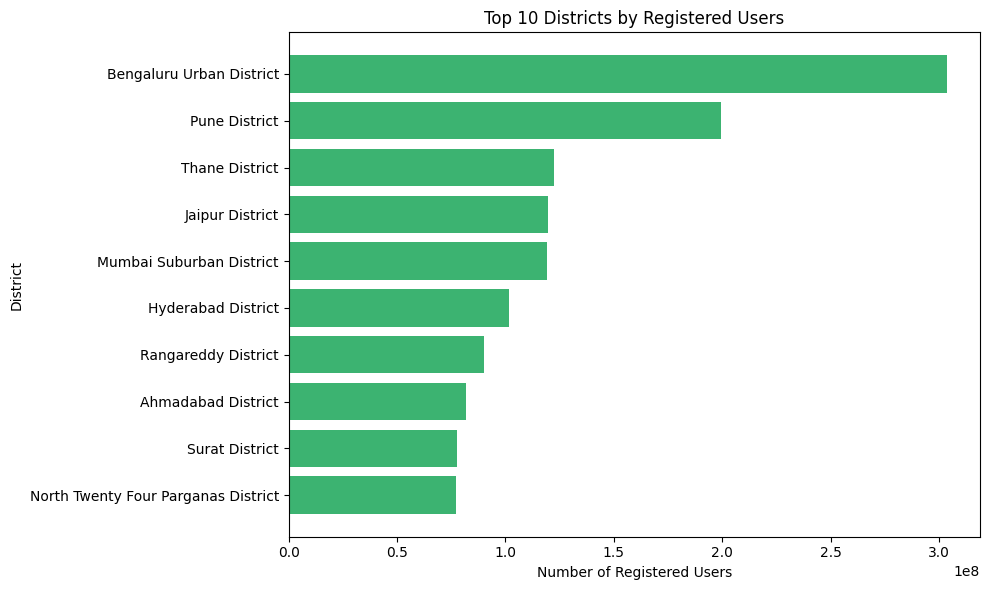

In [28]:

# Sort and take Top 10
top10_districts = df_result.sort_values(by='total_registered_users', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
plt.barh(top10_districts['district'], top10_districts['total_registered_users'], color='mediumseagreen')
plt.title('Top 10 Districts by Registered Users')
plt.xlabel('Number of Registered Users')
plt.ylabel('District')
plt.gca().invert_yaxis()  # To show highest first
plt.tight_layout()
plt.show()


✅ Business Insight:

"Districts like Bangalore Urban and Pune dominate user registration, suggesting dense urban adoption."

In [29]:
def run_query(query):
    df = pd.read_sql(query, connection)
    print(tabulate(df, headers='keys', tablefmt='psql'))
    return df

# 🔹 Top 10 States with Highest App Opens

query = """
SELECT 
    state,
    SUM(app_opens) AS total_app_opens
FROM 
    aggregated_user
GROUP BY 
    state
ORDER BY 
    total_app_opens DESC
LIMIT 10;

"""
df_result = run_query(query)

+----+----------------+-------------------+
|    | state          |   total_app_opens |
|----+----------------+-------------------|
|  0 | maharashtra    |       1.30903e+11 |
|  1 | karnataka      |       1.21506e+11 |
|  2 | andhra-pradesh |       1.02445e+11 |
|  3 | rajasthan      |       1.00093e+11 |
|  4 | telangana      |       9.26399e+10 |
|  5 | uttar-pradesh  |       7.21782e+10 |
|  6 | madhya-pradesh |       7.15242e+10 |
|  7 | tamil-nadu     |       3.95785e+10 |
|  8 | odisha         |       3.85364e+10 |
|  9 | bihar          |       3.77226e+10 |
+----+----------------+-------------------+


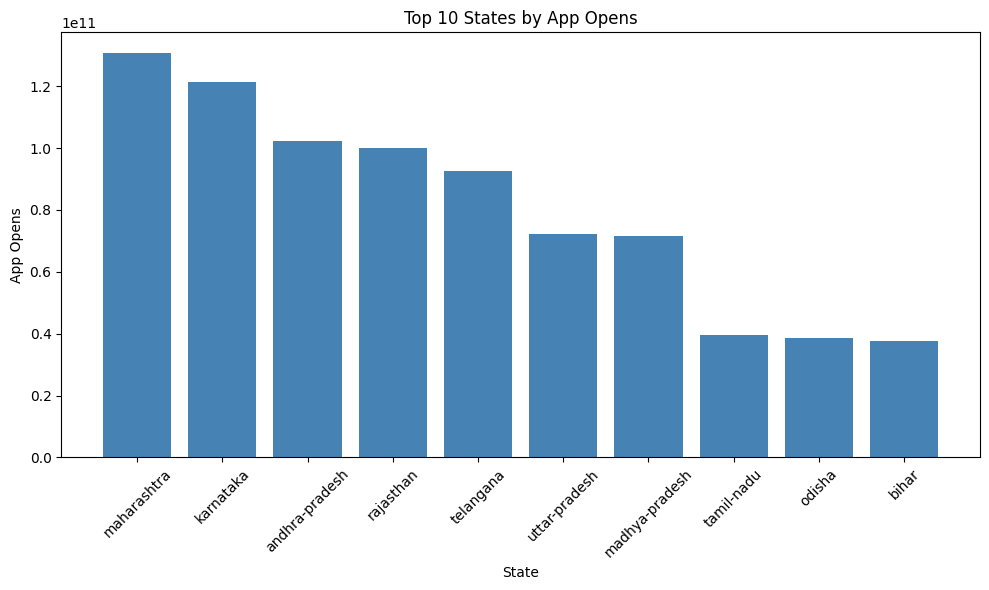

In [30]:

plt.figure(figsize=(10,6))
plt.bar(df_result['state'], df_result['total_app_opens'], color='steelblue')
plt.title('Top 10 States by App Opens')
plt.xlabel('State')
plt.ylabel('App Opens')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


✅ Business Insight:

"States like Maharashtra and Karnataka show the maximum app activity, reflecting higher user engagement and potential for upselling services."

In [31]:
def run_query(query):
    df = pd.read_sql(query, connection)
    print(tabulate(df, headers='keys', tablefmt='psql'))
    return df

# 🔹  Growth Opportunity: States with Low Registered Users but High App Opens 
# (Shows where people open the app but are not fully registered — a big marketing chance!)


query = """
SELECT 
    state,
    SUM(registered_users) AS total_registered_users,
    SUM(app_opens) AS total_app_opens,
    (SUM(app_opens) - SUM(registered_users)) AS gap
FROM 
    aggregated_user
GROUP BY 
    state
HAVING 
    gap > 0
ORDER BY 
    gap DESC;

"""
df_result = run_query(query)

+----+------------------------------------+--------------------------+-------------------+-------------+
|    | state                              |   total_registered_users |   total_app_opens |         gap |
|----+------------------------------------+--------------------------+-------------------+-------------|
|  0 | maharashtra                        |              4.97283e+09 |       1.30903e+11 | 1.2593e+11  |
|  1 | karnataka                          |              3.2051e+09  |       1.21506e+11 | 1.18301e+11 |
|  2 | andhra-pradesh                     |              2.47956e+09 |       1.02445e+11 | 9.99659e+10 |
|  3 | rajasthan                          |              2.3721e+09  |       1.00093e+11 | 9.77213e+10 |
|  4 | telangana                          |              2.33099e+09 |       9.26399e+10 | 9.03089e+10 |
|  5 | madhya-pradesh                     |              1.98729e+09 |       7.15242e+10 | 6.95369e+10 |
|  6 | uttar-pradesh                      |            

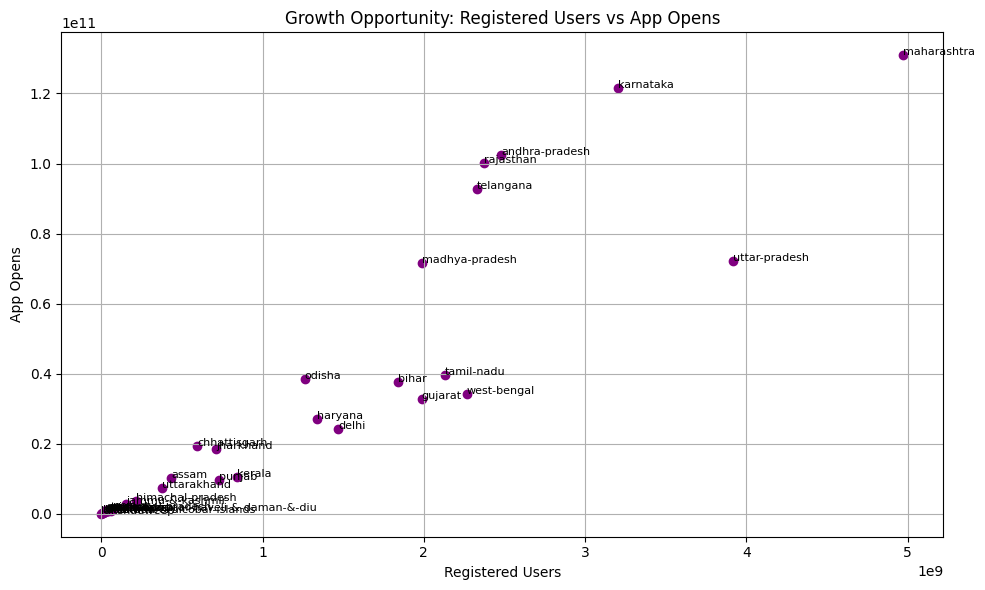

In [36]:

plt.figure(figsize=(10,6))
plt.scatter(df_result['total_registered_users'], df_result['total_app_opens'], color='purple')
for i in range(len(df_result)):
    plt.text(df_result['total_registered_users'][i], df_result['total_app_opens'][i], 
             df_result['state'][i], fontsize=8)
plt.title('Growth Opportunity: Registered Users vs App Opens')
plt.xlabel('Registered Users')
plt.ylabel('App Opens')
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Business Insight:

"States above the diagonal (more app opens but fewer registered users) are opportunities — focus marketing there to convert active app users into registered users."

### 3. Insurance Engagement Analysis

In [37]:
def run_query(query):
    df = pd.read_sql(query, connection)
    print(tabulate(df, headers='keys', tablefmt='psql'))
    return df

# 🔹 State-wise Total Insurance Transactions and Values

query = """
SELECT 
    state,
    SUM(count) AS total_insurance_transactions,
    SUM(amount) AS total_insurance_value
FROM 
    aggregated_insurance
GROUP BY 
    state
ORDER BY 
    total_insurance_transactions DESC;

"""
df_result = run_query(query)

+----+------------------------------------+--------------------------------+-------------------------+
|    | state                              |   total_insurance_transactions |   total_insurance_value |
|----+------------------------------------+--------------------------------+-------------------------|
|  0 | Karnataka                          |                    1.9574e+06  |             2.74315e+09 |
|  1 | Maharashtra                        |                    1.81554e+06 |             2.36313e+09 |
|  2 | Tamil Nadu                         |                    1.21527e+06 |             1.55551e+09 |
|  3 | Uttar Pradesh                      |                    1.13915e+06 |             1.74035e+09 |
|  4 | Telangana                          |               894342           |             1.17106e+09 |
|  5 | West Bengal                        |               839715           |             1.05246e+09 |
|  6 | Kerala                             |               824235         

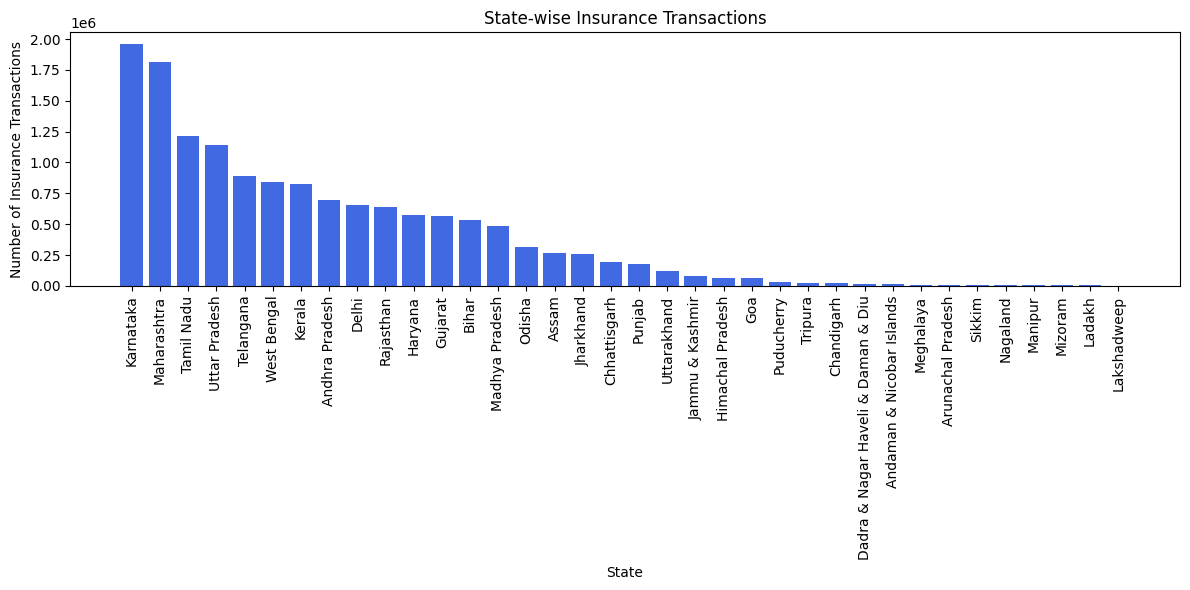

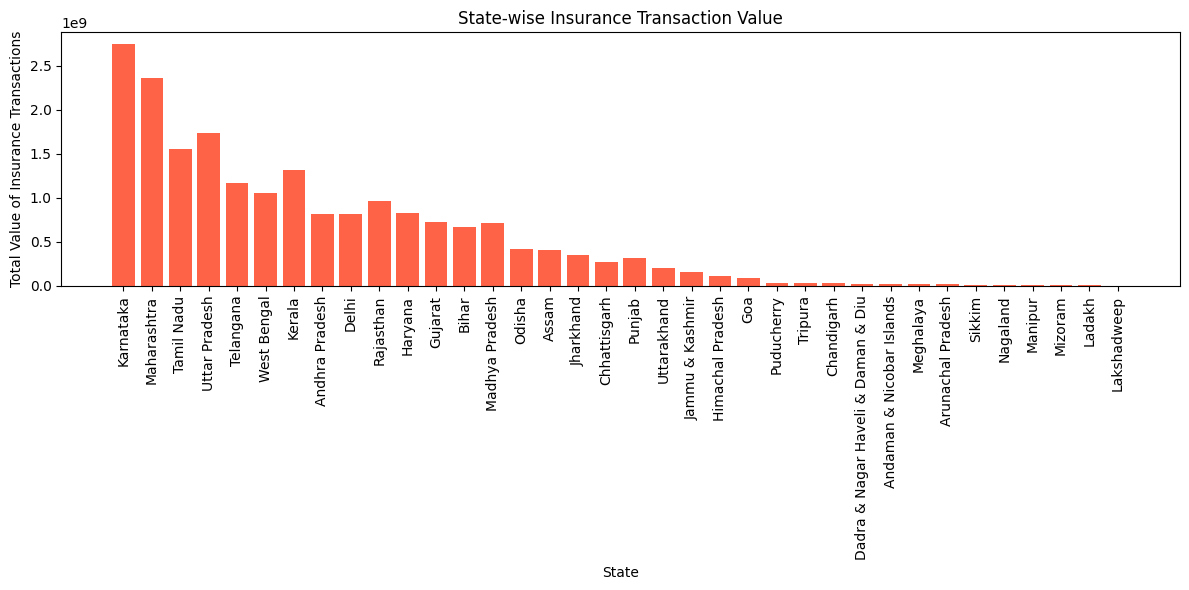

In [ ]:

# Bar plot for Insurance Transactions
plt.figure(figsize=(12,6))
plt.bar(df_result['state'], df_result['total_insurance_transactions'], color='royalblue')
plt.title('State-wise Insurance Transactions')
plt.xlabel('State')
plt.ylabel('Number of Insurance Transactions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Bar plot for Insurance Value
plt.figure(figsize=(12,6))
plt.bar(df_result['state'], df_result['total_insurance_value'], color='tomato')
plt.title('State-wise Insurance Transaction Value')
plt.xlabel('State')
plt.ylabel('Total Value of Insurance Transactions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


✅ Business Insight:

"States like Karnataka, Maharashtra, and Tamil Nadu lead in insurance transactions and value, suggesting higher insurance awareness among users."

In [39]:
def run_query(query):
    df = pd.read_sql(query, connection)
    print(tabulate(df, headers='keys', tablefmt='psql'))
    return df

# 🔹 District-wise Total Insurance Transactions

query = """
SELECT 
    state,
    district,
    SUM(policy_count) AS total_insurance_transactions,
    SUM(insured_amount) AS total_insurance_value
FROM 
    map_insurance
GROUP BY 
    state, district
ORDER BY 
    total_insurance_transactions DESC;
"""
df_result = run_query(query)

+-----+------------------------------------+------------------------------------------+--------------------------------+-------------------------+
|     | state                              | district                                 |   total_insurance_transactions |   total_insurance_value |
|-----+------------------------------------+------------------------------------------+--------------------------------+-------------------------|
|   0 | Karnataka                          | bengaluru urban district                 |                    1.11769e+06 |             1.49196e+09 |
|   1 | Maharashtra                        | pune district                            |               396173           |             5.34031e+08 |
|   2 | Maharashtra                        | thane district                           |               260578           |             3.04071e+08 |
|   3 | Tamil Nadu                         | chennai district                         |               251081          

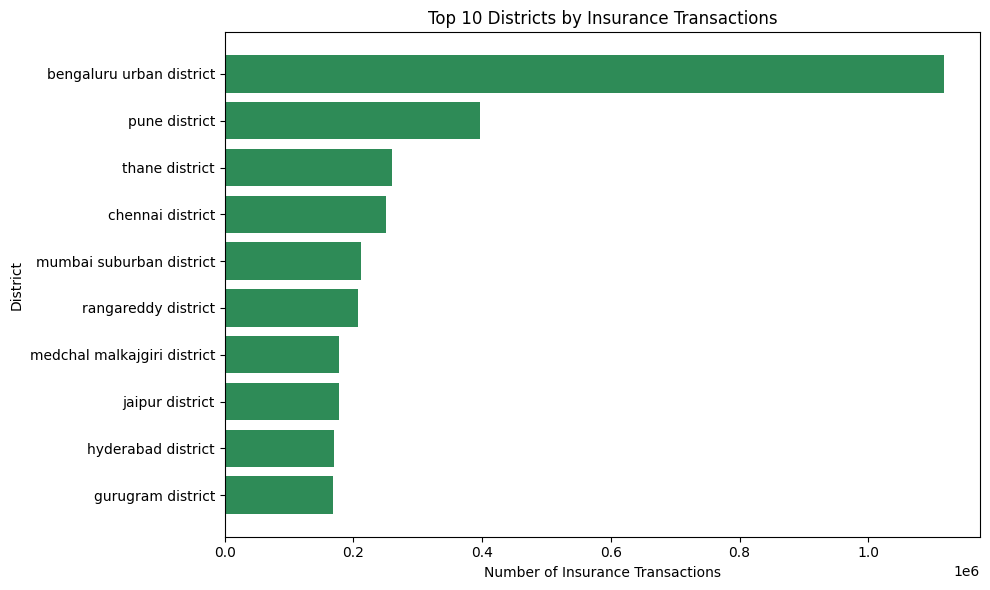

In [40]:

top10_districts_insurance = df_result.sort_values(by='total_insurance_transactions', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top10_districts_insurance['district'], top10_districts_insurance['total_insurance_transactions'], color='seagreen')
plt.title('Top 10 Districts by Insurance Transactions')
plt.xlabel('Number of Insurance Transactions')
plt.ylabel('District')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


✅ Business Insight:

"Urban centers like Bangalore Urban and Pune show high insurance engagement, aligning with financial literacy trends."

In [41]:
def run_query(query):
    df = pd.read_sql(query, connection)
    print(tabulate(df, headers='keys', tablefmt='psql'))
    return df

# 🔹 Top 10 States by Insurance Transaction Value

query = """
SELECT 
    state,
    SUM(amount) AS total_insurance_value
FROM 
    aggregated_insurance
GROUP BY 
    state
ORDER BY 
    total_insurance_value DESC
LIMIT 10;

"""
df_result = run_query(query)

+----+---------------+-------------------------+
|    | state         |   total_insurance_value |
|----+---------------+-------------------------|
|  0 | Karnataka     |             2.74315e+09 |
|  1 | Maharashtra   |             2.36313e+09 |
|  2 | Uttar Pradesh |             1.74035e+09 |
|  3 | Tamil Nadu    |             1.55551e+09 |
|  4 | Kerala        |             1.31372e+09 |
|  5 | Telangana     |             1.17106e+09 |
|  6 | West Bengal   |             1.05246e+09 |
|  7 | Rajasthan     |             9.59654e+08 |
|  8 | Haryana       |             8.30981e+08 |
|  9 | Delhi         |             8.15365e+08 |
+----+---------------+-------------------------+


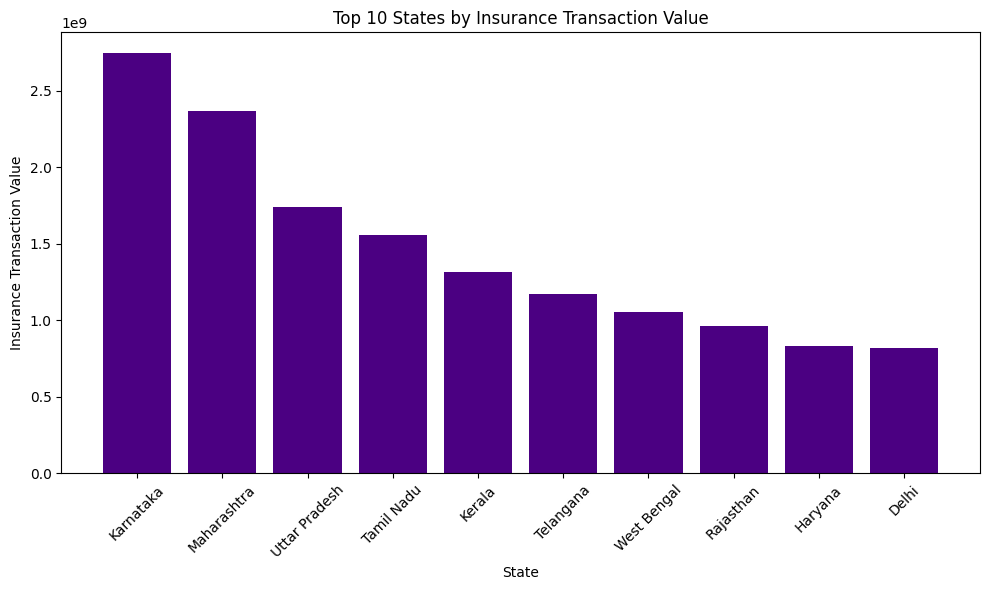

In [42]:

plt.figure(figsize=(10,6))
plt.bar(df_result['state'], df_result['total_insurance_value'], color='indigo')
plt.title('Top 10 States by Insurance Transaction Value')
plt.xlabel('State')
plt.ylabel('Insurance Transaction Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


✅ Business Insight:

"States with the highest insurance transaction value represent mature markets; further cross-selling of premium plans can be explored."

In [12]:
def run_query(query):
    df = pd.read_sql(query, connection)
    print(tabulate(df, headers='keys', tablefmt='psql'))
    return df

# 🔹 Find States with Low Insurance Uptake (To suggest more marketing focus)

query = """
SELECT 
    state,
    SUM(count) AS total_insurance_transactions
FROM 
    aggregated_insurance
GROUP BY 
    state
HAVING 
    SUM(count) < 50000
ORDER BY 
    total_insurance_transactions ASC;
"""
df_result = run_query(query)

+----+------------------------------------+--------------------------------+
|    | state                              |   total_insurance_transactions |
|----+------------------------------------+--------------------------------|
|  0 | Lakshadweep                        |                            496 |
|  1 | Ladakh                             |                           3338 |
|  2 | Mizoram                            |                           3724 |
|  3 | Manipur                            |                           3731 |
|  4 | Nagaland                           |                           4745 |
|  5 | Sikkim                             |                           4896 |
|  6 | Arunachal Pradesh                  |                          10214 |
|  7 | Meghalaya                          |                          10461 |
|  8 | Andaman & Nicobar Islands          |                          12997 |
|  9 | Dadra & Nagar Haveli & Daman & Diu |                          13792 |

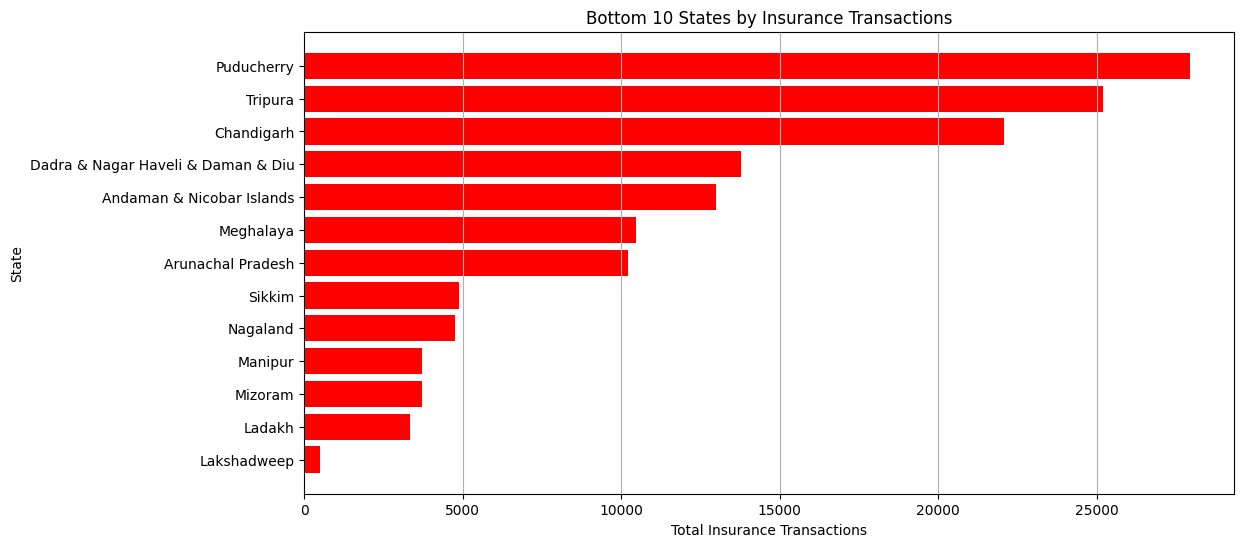

In [13]:

plt.figure(figsize=(12,6))
plt.barh(df_result['state'], df_result['total_insurance_transactions'], color='red')
plt.title('Bottom 10 States by Insurance Transactions')
plt.xlabel('Total Insurance Transactions')
plt.ylabel('State')
plt.grid(axis='x')
plt.show()


Business Insight:
"The analysis highlights that states like Lakshadweep, Ladakh, and others have the lowest insurance transaction counts. This indicates a major growth opportunity where PhonePe can target insurance marketing campaigns, customized offerings, or awareness programs to increase insurance penetration."

In [8]:
def run_query(query):
    df = pd.read_sql(query, connection)
    print(tabulate(df, headers='keys', tablefmt='psql'))
    return df

# 🔹  Compare Insurance vs Total Transactions

query = """
SELECT 
    ins.state,
    (SUM(ins.amount) / SUM(trx.amount)) * 100 AS insurance_percentage
FROM 
    aggregated_insurance ins
JOIN 
    aggregated_transaction trx 
ON 
    ins.state = trx.state
GROUP BY 
    ins.state
ORDER BY 
    insurance_percentage DESC;

"""
df_result = run_query(query)

+----+------------------------------------+------------------------+
|    | state                              |   insurance_percentage |
|----+------------------------------------+------------------------|
|  0 | Kerala                             |              0.314668  |
|  1 | Lakshadweep                        |              0.305649  |
|  2 | Andaman & Nicobar Islands          |              0.202144  |
|  3 | Himachal Pradesh                   |              0.1257    |
|  4 | Tripura                            |              0.123953  |
|  5 | Goa                                |              0.12073   |
|  6 | Puducherry                         |              0.115256  |
|  7 | Tamil Nadu                         |              0.096024  |
|  8 | Jammu & Kashmir                    |              0.0957362 |
|  9 | Meghalaya                          |              0.0922838 |
| 10 | Assam                              |              0.0876835 |
| 11 | Mizoram                    

Purpose : How much % of PhonePe usage is insurance-related?

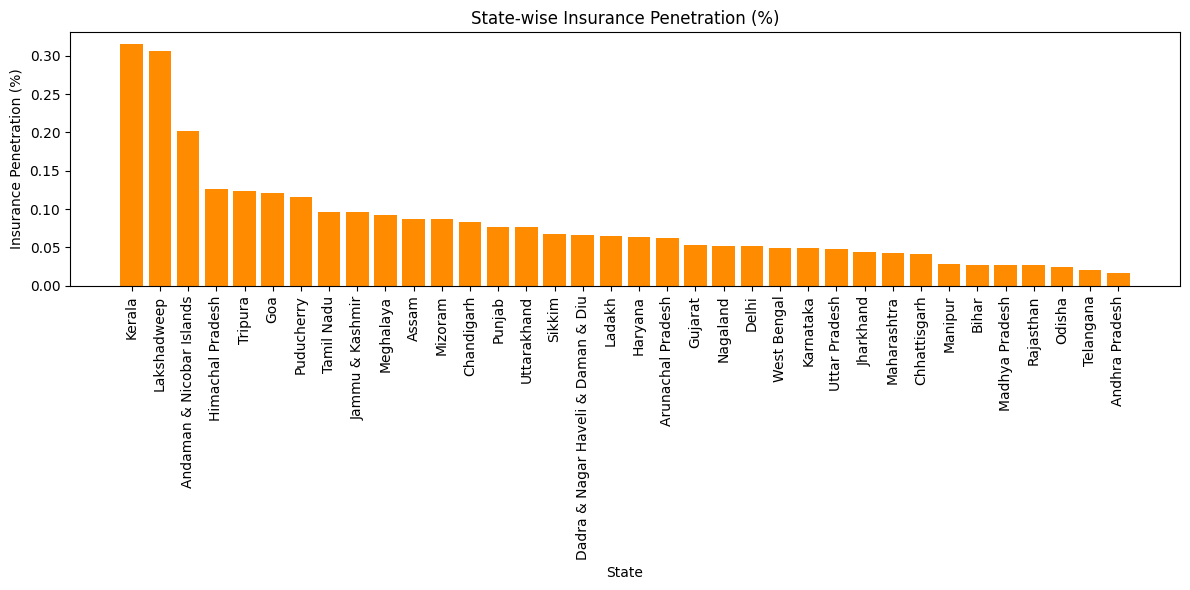

In [10]:

plt.figure(figsize=(12,6))
plt.bar(df_result['state'], df_result['insurance_percentage'], color='darkorange')
plt.title('State-wise Insurance Penetration (%)')
plt.xlabel('State')
plt.ylabel('Insurance Penetration (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


✅ Insight:

"States with low insurance penetration (e.g., Andra Pradesh and Madhya Pradesh) represent significant opportunities for insurance marketing and user education."

### 4.Transaction Analysis Across States and Districts

In [14]:
def run_query(query):
    df = pd.read_sql(query, connection)
    print(tabulate(df, headers='keys', tablefmt='psql'))
    return df

# 🔹 Top States by Total Transaction Value

query = """
SELECT 
    state,
    SUM(count) AS total_transactions,
    SUM(amount) AS total_transaction_value
FROM 
    aggregated_transaction
GROUP BY 
    state
ORDER BY 
    total_transaction_value DESC
LIMIT 10;

"""
df_result = run_query(query)

+----+----------------+----------------------+---------------------------+
|    | state          |   total_transactions |   total_transaction_value |
|----+----------------+----------------------+---------------------------|
|  0 | Telangana      |          2.61747e+10 |               4.1656e+13  |
|  1 | Karnataka      |          3.09709e+10 |               4.06787e+13 |
|  2 | Maharashtra    |          3.19852e+10 |               4.03742e+13 |
|  3 | Andhra Pradesh |          1.89187e+10 |               3.46691e+13 |
|  4 | Uttar Pradesh  |          1.85236e+10 |               2.68852e+13 |
|  5 | Rajasthan      |          1.71085e+10 |               2.63432e+13 |
|  6 | Madhya Pradesh |          1.40722e+10 |               1.91253e+13 |
|  7 | Bihar          |          1.0941e+10  |               1.79013e+13 |
|  8 | West Bengal    |          9.1915e+09  |               1.55842e+13 |
|  9 | Odisha         |          8.91853e+09 |               1.2264e+13  |
+----+----------------+--

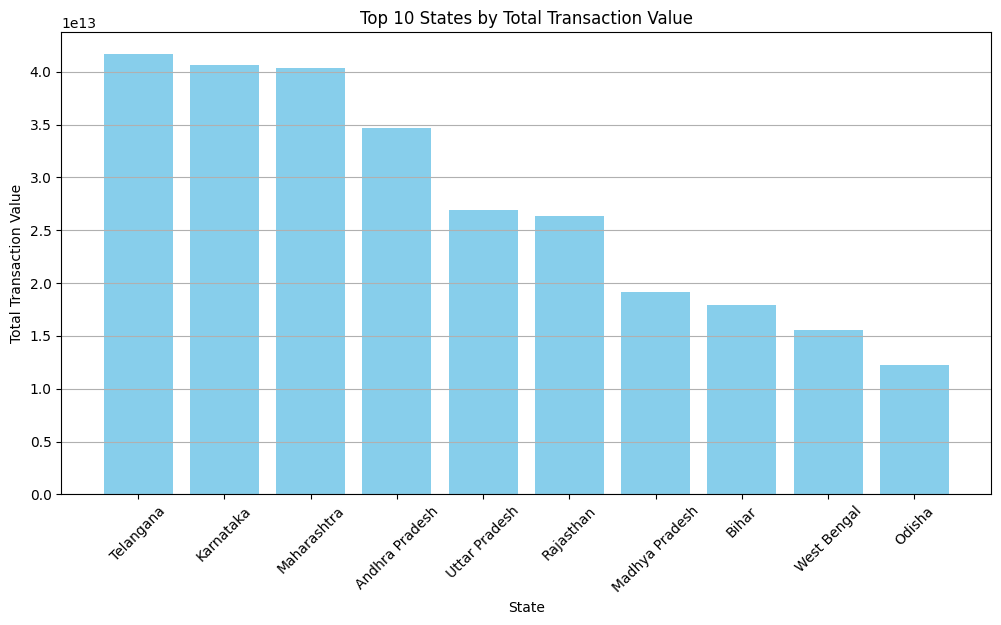

In [15]:

df_top_states = df_result.sort_values(by='total_transaction_value', ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.bar(df_top_states['state'], df_top_states['total_transaction_value'], color='skyblue')
plt.title('Top 10 States by Total Transaction Value')
plt.xlabel('State')
plt.ylabel('Total Transaction Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [16]:
def run_query(query):
    df = pd.read_sql(query, connection)
    print(tabulate(df, headers='keys', tablefmt='psql'))
    return df

# 🔹 Top Districts by Total Transaction Value

query = """
SELECT 
    state,
    district,
    SUM(transaction_count) AS total_transactions,
    SUM(transaction_amount) AS total_transaction_value
FROM 
    map_transaction
GROUP BY 
    state, district
ORDER BY 
    total_transaction_value DESC
LIMIT 10;
"""
df_result = run_query(query)

+----+----------------+-----------------------------+----------------------+---------------------------+
|    | state          | district                    |   total_transactions |   total_transaction_value |
|----+----------------+-----------------------------+----------------------+---------------------------|
|  0 | Karnataka      | bengaluru urban district    |          1.71081e+10 |               1.99378e+13 |
|  1 | Telangana      | hyderabad district          |          7.70137e+09 |               1.19069e+13 |
|  2 | Maharashtra    | pune district               |          9.36905e+09 |               9.73022e+12 |
|  3 | Rajasthan      | jaipur district             |          5.39687e+09 |               7.85409e+12 |
|  4 | Telangana      | rangareddy district         |          5.03842e+09 |               7.15514e+12 |
|  5 | Telangana      | medchal malkajgiri district |          4.10732e+09 |               5.75888e+12 |
|  6 | Andhra Pradesh | visakhapatnam district      |  

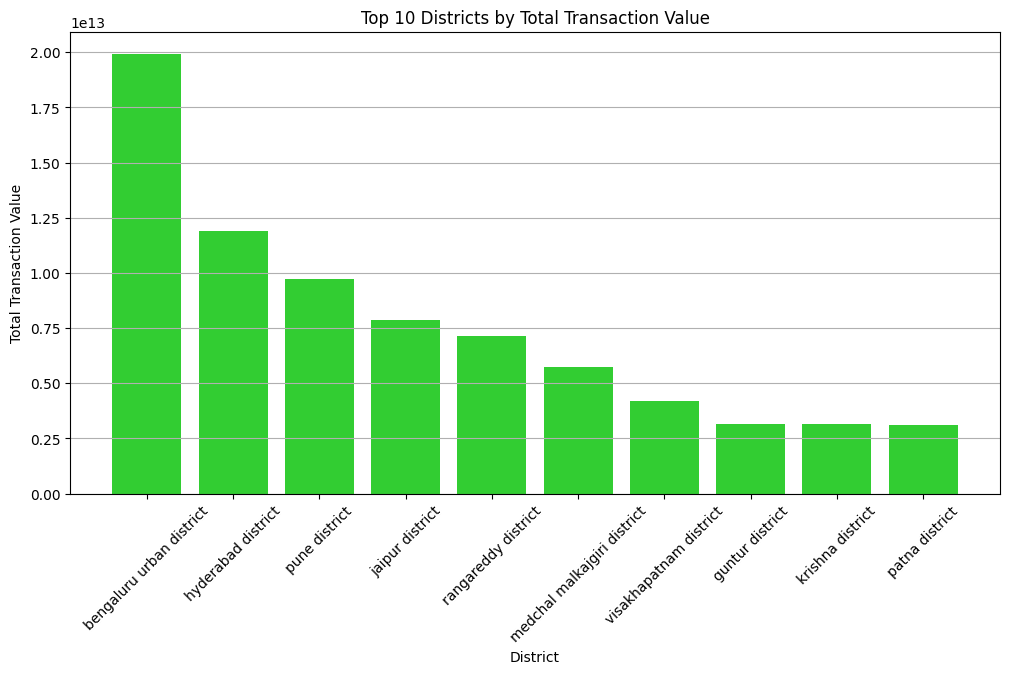

In [17]:

df_top_districts = df_result.sort_values(by='total_transaction_value', ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.bar(df_top_districts['district'], df_top_districts['total_transaction_value'], color='limegreen')
plt.title('Top 10 Districts by Total Transaction Value')
plt.xlabel('District')
plt.ylabel('Total Transaction Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [18]:
def run_query(query):
    df = pd.read_sql(query, connection)
    print(tabulate(df, headers='keys', tablefmt='psql'))
    return df

# 🔹 Bottom 10 States (Low Transaction Value)  -- (To find regions where marketing is needed)

query = """
SELECT 
    state,
    SUM(count) AS total_transactions,
    SUM(amount) AS total_transaction_value
FROM 
    aggregated_transaction
GROUP BY 
    state
ORDER BY 
    total_transaction_value ASC
LIMIT 10;

"""
df_result = run_query(query)

+----+------------------------------------+----------------------+---------------------------+
|    | state                              |   total_transactions |   total_transaction_value |
|----+------------------------------------+----------------------+---------------------------|
|  0 | Lakshadweep                        |     883994           |               1.60932e+09 |
|  1 | Mizoram                            |          1.95358e+07 |               4.61021e+10 |
|  2 | Andaman & Nicobar Islands          |          3.9707e+07  |               7.06675e+10 |
|  3 | Ladakh                             |          3.93459e+07 |               8.89946e+10 |
|  4 | Sikkim                             |          6.58608e+07 |               1.18945e+11 |
|  5 | Nagaland                           |          5.47687e+07 |               1.30359e+11 |
|  6 | Meghalaya                          |          8.86354e+07 |               1.62544e+11 |
|  7 | Manipur                            |       

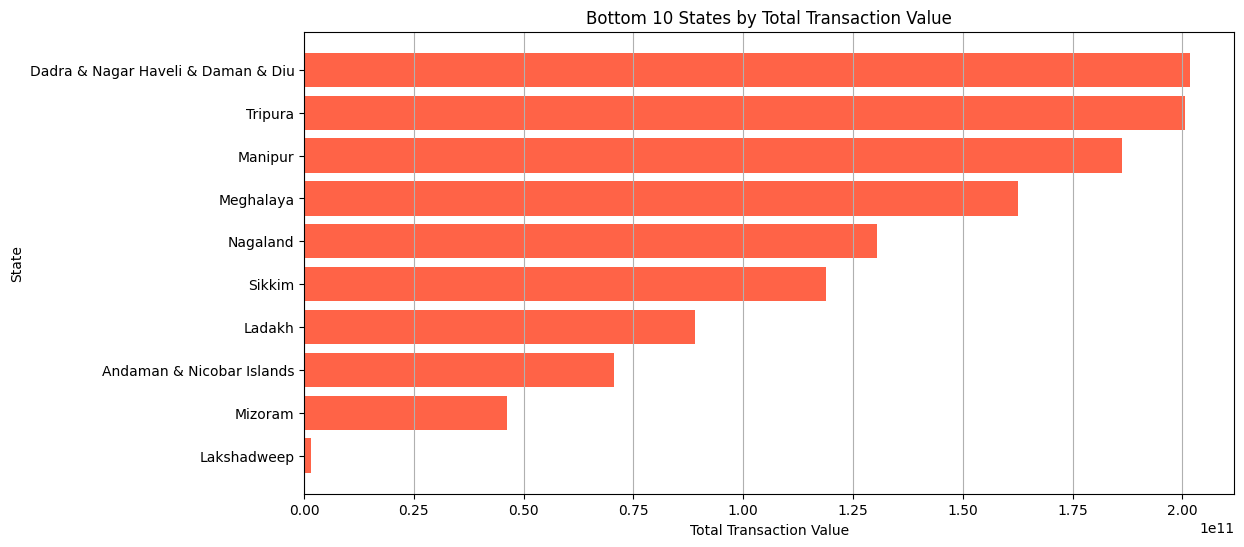

In [19]:
# Sort ascending and take bottom 10
df_bottom_states = df_result.sort_values(by='total_transaction_value', ascending=True).head(10)

plt.figure(figsize=(12,6))
plt.barh(df_bottom_states['state'], df_bottom_states['total_transaction_value'], color='tomato')
plt.title('Bottom 10 States by Total Transaction Value')
plt.xlabel('Total Transaction Value')
plt.ylabel('State')
plt.grid(axis='x')
plt.show()


In [20]:
def run_query(query):
    df = pd.read_sql(query, connection)
    print(tabulate(df, headers='keys', tablefmt='psql'))
    return df

# 🔹 contribution percentage of a district in state’s total!

query = """
SELECT 
    m.state,
    m.district,
    SUM(m.transaction_amount) AS district_total,
    (SUM(m.transaction_amount) / s.state_total) * 100 AS contribution_percentage
FROM 
    map_transaction m
JOIN 
    (SELECT 
         state, 
         SUM(amount) AS state_total 
     FROM 
         aggregated_transaction 
     GROUP BY 
         state) s
ON 
    m.state = s.state
GROUP BY 
    m.state, m.district, s.state_total
ORDER BY 
    contribution_percentage DESC;


"""
df_result = run_query(query)

+-----+------------------------------------+------------------------------------------+------------------+---------------------------+
|     | state                              | district                                 |   district_total |   contribution_percentage |
|-----+------------------------------------+------------------------------------------+------------------+---------------------------|
|   0 | Chandigarh                         | chandigarh district                      |      2.92907e+11 |              100          |
|   1 | Lakshadweep                        | lakshadweep district                     |      1.60932e+09 |              100          |
|   2 | Andaman & Nicobar Islands          | south andaman district                   |      6.12694e+10 |               86.701      |
|   3 | Ladakh                             | leh ladakh district                      |      7.27754e+10 |               81.7751     |
|   4 | Puducherry                         | puducherry

➡️ Purpose: This will show which districts contribute maximum % to their state’s economy through PhonePe transactions!

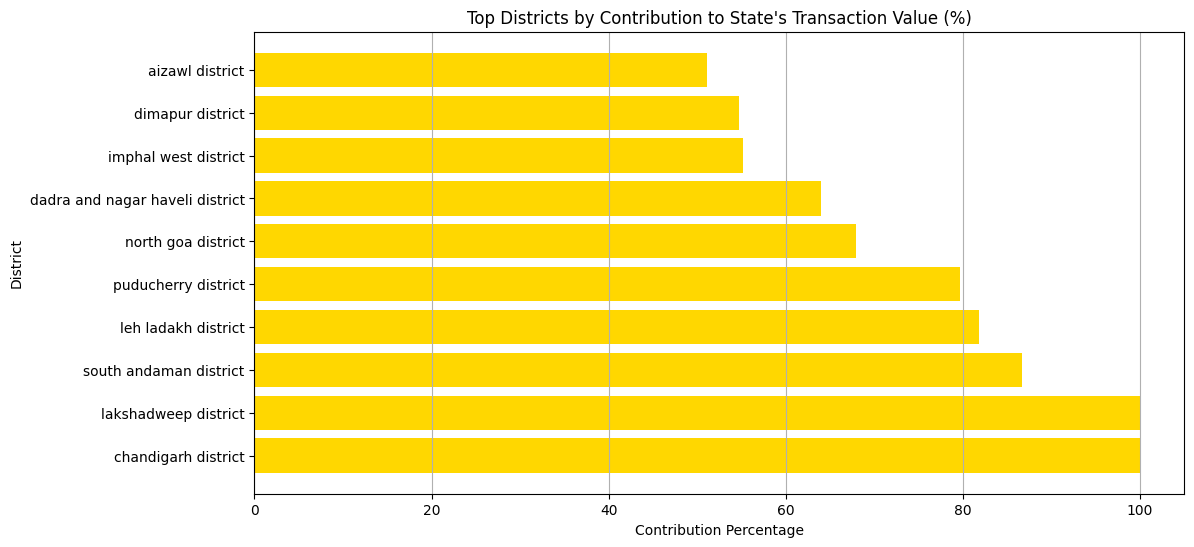

In [21]:
# Sort and pick Top 10 highest contributing districts
df_contribution_top = df_result.sort_values(by='contribution_percentage', ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.barh(df_contribution_top['district'], df_contribution_top['contribution_percentage'], color='gold')
plt.title('Top Districts by Contribution to State\'s Transaction Value (%)')
plt.xlabel('Contribution Percentage')
plt.ylabel('District')
plt.grid(axis='x')
plt.show()


Business Insights:


Top Performing Regions:

States like Maharashtra, Karnataka, and Telangana dominate the transaction value, indicating a mature and digitally active user base.

District Hotspots:

Districts like Bengaluru Urban, Pune, and Hyderabad are key transaction hubs — these regions can be leveraged for premium services.

Low Performing States:

States like Lakshadweep, Mizoram, and Andaman and Nicobar Island show low transaction volumes, suggesting a potential for targeted marketing campaigns and partnership building.

District Dependence:

Some states show heavy dependence on just 1-2 districts (example: Chandigarh District drives a big chunk of Punjab’s transactions). Such states should diversify focus beyond just top cities.

### 5.User Registration Analysis

In [ ]:
def run_query(query):
    df = pd.read_sql(query, connection)
    print(tabulate(df, headers='keys', tablefmt='psql'))
    return df

# 🔹Brand Preference Analysis

query = """
SELECT 
    brand,
    SUM(device_count) as total_devices,
    ROUND(AVG(device_percentage) * 100, 2) as average_percentage
FROM aggregated_user
GROUP BY brand
ORDER BY total_devices DESC
LIMIT 10;
"""
df_result = run_query(query)

+----+----------+-----------------+----------------------+
|    | brand    |   total_devices |   average_percentage |
|----+----------+-----------------+----------------------|
|  0 | Xiaomi   |     8.69563e+08 |                26.13 |
|  1 | Samsung  |     6.71604e+08 |                19.21 |
|  2 | Vivo     |     6.25415e+08 |                16.6  |
|  3 | Oppo     |     4.2025e+08  |                11.6  |
|  4 | Others   |     2.8295e+08  |                 9.1  |
|  5 | Realme   |     2.19973e+08 |                 5.9  |
|  6 | Apple    |     9.59473e+07 |                 3.35 |
|  7 | Motorola |     7.33407e+07 |                 2.17 |
|  8 | OnePlus  |     6.36772e+07 |                 2.36 |
|  9 | Huawei   |     5.71297e+07 |                 2.08 |
+----+----------+-----------------+----------------------+


Purpose : This query analyzes which mobile brands are most popular among PhonePe users

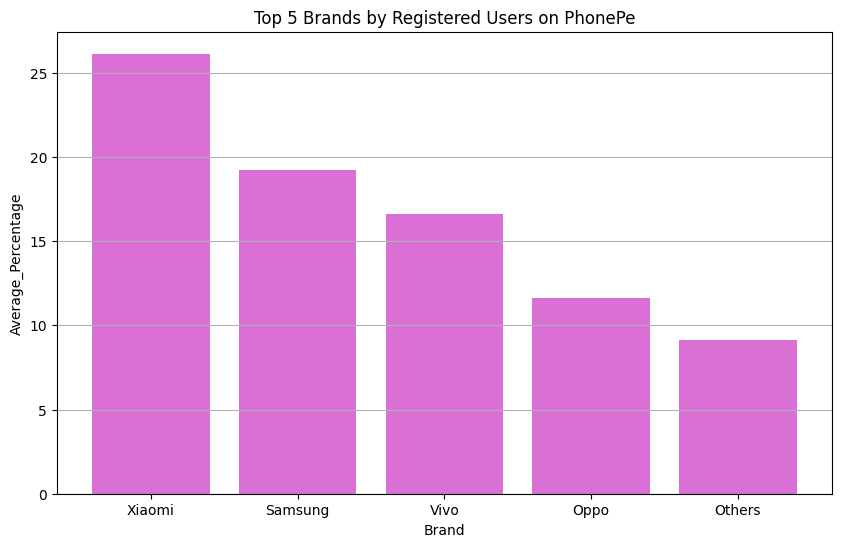

In [5]:
# Sort by registered users and take Top 5 Brands
df_brand_pref = df_result.sort_values(by='average_percentage', ascending=False).head(5)

plt.figure(figsize=(10,6))
plt.bar(df_brand_pref['brand'], df_brand_pref['average_percentage'], color='orchid')
plt.title('Top 5 Brands by Registered Users on PhonePe')
plt.xlabel('Brand')
plt.ylabel('Average_Percentage')
plt.grid(axis='y')
plt.show()


Business Insight:

Identify which brands dominate user registrations.

Indicates brand trust and regional preferences.

In [6]:
def run_query(query):
    df = pd.read_sql(query, connection)
    print(tabulate(df, headers='keys', tablefmt='psql'))
    return df

# 🔹Comprehensive Registration Analysis with Multiple Metrics

query = """
SELECT 
    m.state,
    SUM(m.registered_users) as total_registered_users,
    COUNT(DISTINCT m.district) as districts_count,
    ROUND(SUM(m.registered_users) / COUNT(DISTINCT m.district), 0) as avg_users_per_district,
    (SELECT SUM(transaction_count) 
     FROM map_transaction mt 
     ) as total_transactions
FROM map_user m
GROUP BY m.state
ORDER BY total_registered_users DESC;
"""
df_result = run_query(query)

+----+------------------------------------+--------------------------+-------------------+--------------------------+----------------------+
|    | state                              |   total_registered_users |   districts_count |   avg_users_per_district |   total_transactions |
|----+------------------------------------+--------------------------+-------------------+--------------------------+----------------------|
|  0 | maharashtra                        |              1.14014e+09 |                38 |              3.00036e+07 |          2.35284e+11 |
|  1 | uttar-pradesh                      |              9.42334e+08 |                81 |              1.16338e+07 |          2.35284e+11 |
|  2 | karnataka                          |              7.33674e+08 |                34 |              2.15787e+07 |          2.35284e+11 |
|  3 | andhra-pradesh                     |              5.56747e+08 |                28 |              1.98838e+07 |          2.35284e+11 |
|  4 | rajast

Purpose: Performance Benchmarking, Resource Allocation Decisions, and this comprehensive view supports data-driven decisions about where to focus marketing efforts, support resources, or special promotions to drive both acquisition and engagement.

C:\Users\HP\AppData\Local\Temp\ipykernel_11764\160104856.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_users, x='state', y='total_registered_users', palette='Purples_d')


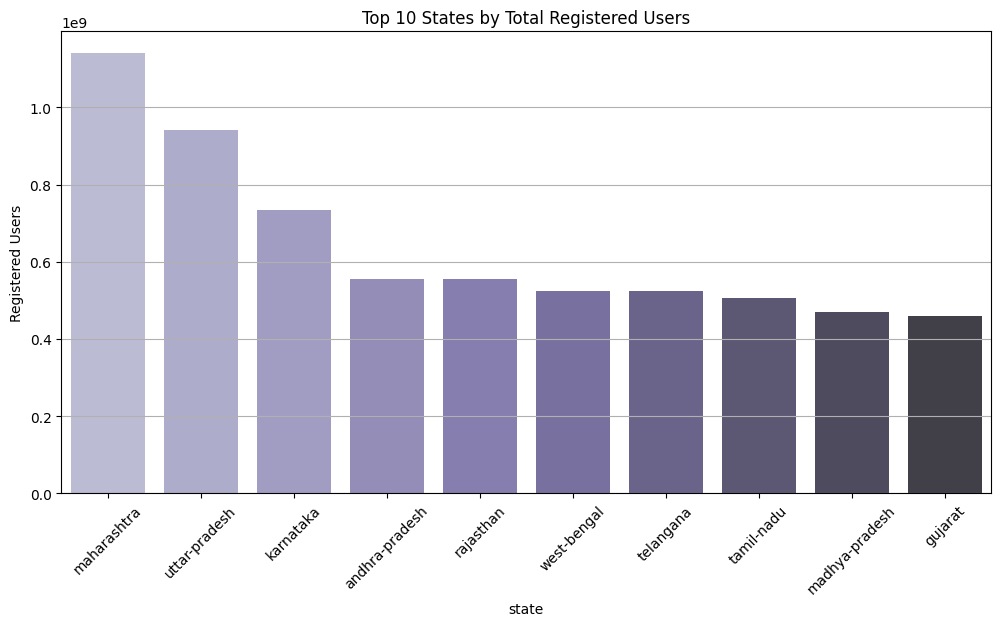

In [ ]:
# 🔹 1. Top 10 States by Total Registered Users
df_top_users = df_result.sort_values(by='total_registered_users', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=df_top_users, x='state', y='total_registered_users', palette='Purples_d')
plt.title('Top 10 States by Total Registered Users')
plt.xticks(rotation=45)
plt.ylabel('Registered Users')
plt.grid(axis='y')
plt.show()


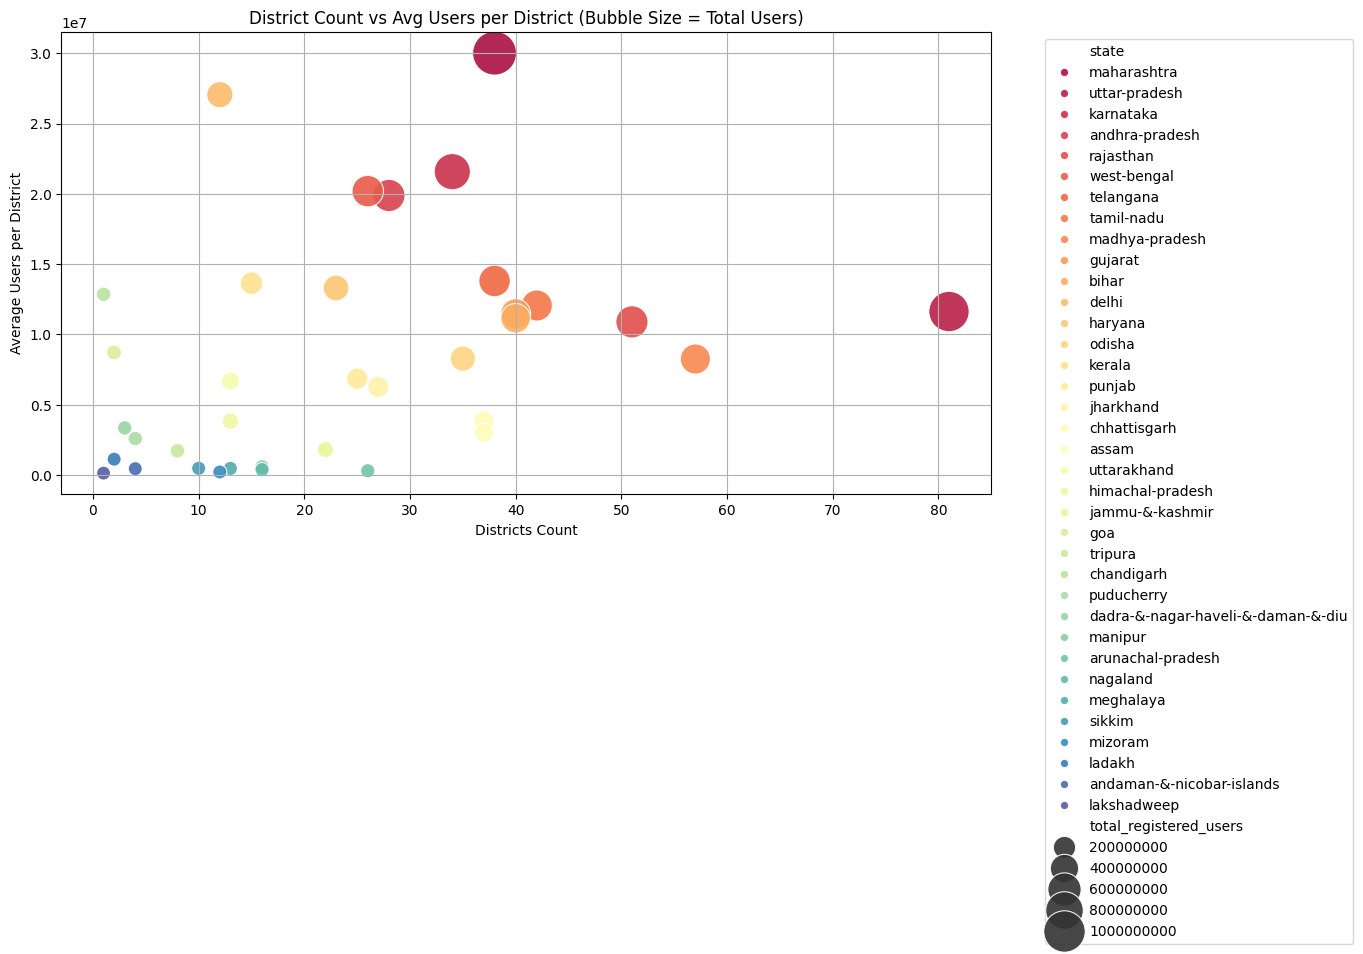

In [ ]:
# 🔹 2. Average Users per District vs District Count (Bubble Plot)

plt.figure(figsize=(12,6))
sns.scatterplot(data=df_result, x='districts_count', y='avg_users_per_district',
                size='total_registered_users', hue='state', palette='Spectral', sizes=(100, 1000), alpha=0.9)

plt.title('District Count vs Avg Users per District (Bubble Size = Total Users)')
plt.xlabel('Districts Count')
plt.ylabel('Average Users per District')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Business Insights: Helps identify whether high registrations are due to more districts or high penetration.

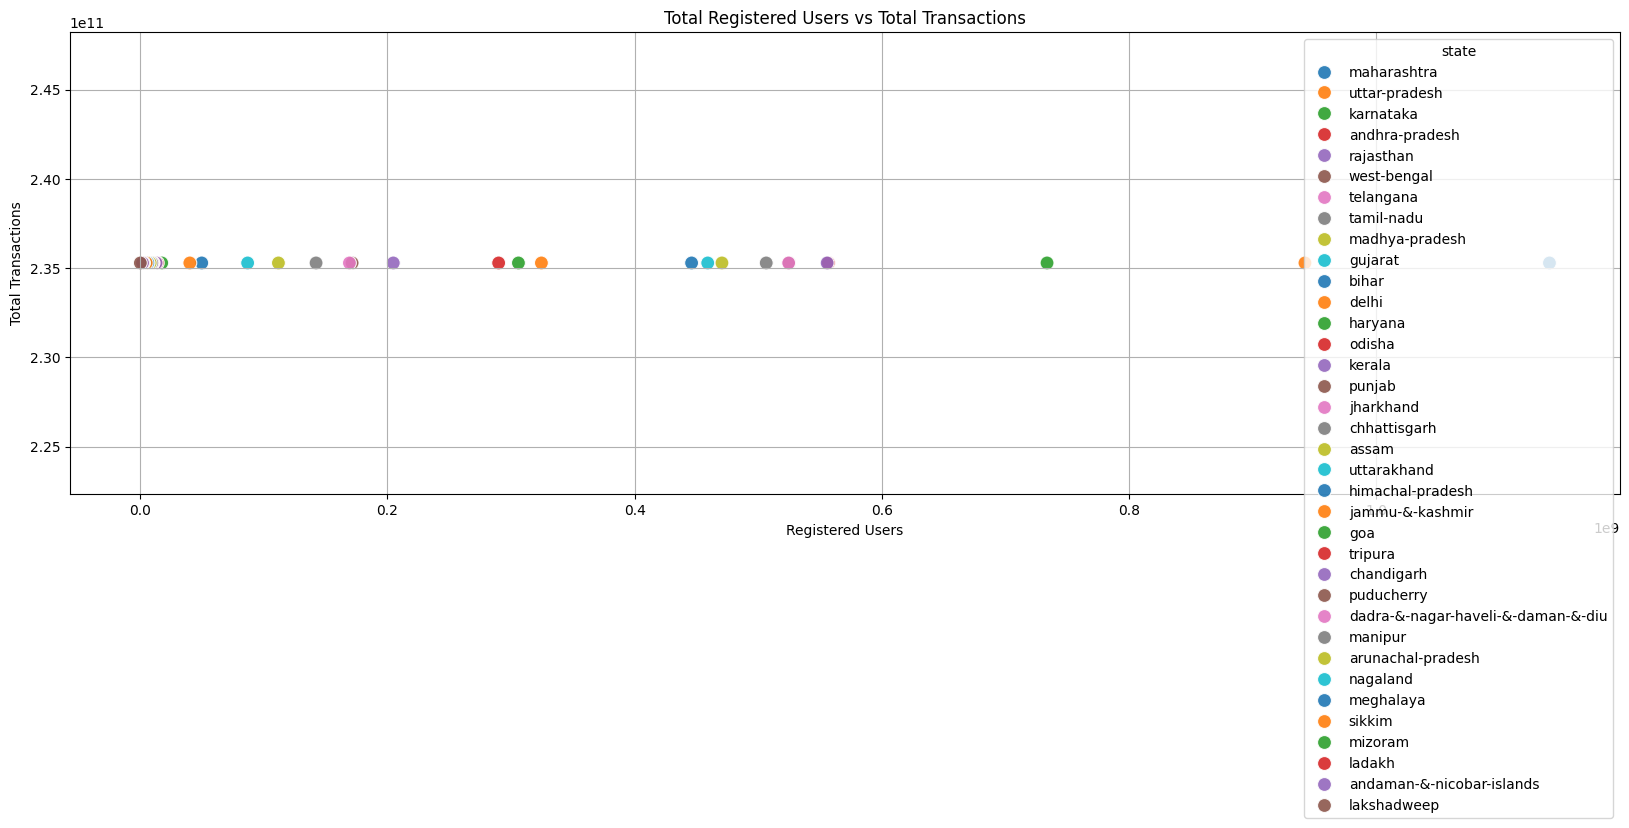

In [19]:
# 🔹 3. Registered Users vs Total Transactions (Engagement)

plt.figure(figsize=(20,6))
sns.scatterplot(data=df_result, x='total_registered_users', y='total_transactions',
                hue='state', palette='tab10', alpha=0.9, s=100)

plt.title('Total Registered Users vs Total Transactions')
plt.xlabel('Registered Users')
plt.ylabel('Total Transactions')
plt.grid(True)
plt.show()


Business Insights: This shows how much users are engaged in transacting.

Metric Combo                                | What to Observe    | Insight

High users but low avg per district         | Spread thin        | User concentration is low; marketing can focus on dense areas

High users, high transactions               | Good conversion    | Indicates strong onboarding and active users

High districts, low total users             | Untapped potential | Launch district-focused campaigns

Low avg per district, low transactions      | Engagement problem | App downloads not converting to transactions 

In [17]:
def run_query(query):
    df = pd.read_sql(query, connection)
    print(tabulate(df, headers='keys', tablefmt='psql'))
    return df

# 🔹Year-on-Year Growth in User Registration by State

query = """
WITH yearly_registrations AS (
    SELECT 
        state,
        year,
        SUM(registered_users) as yearly_users
    FROM map_user
    GROUP BY state, year
),
yearly_growth AS (
    SELECT 
        current.state,
        current.year as current_year,
        current.yearly_users as current_year_users,
        prev.year as previous_year,
        prev.yearly_users as previous_year_users,
        (current.yearly_users - prev.yearly_users) as absolute_growth,
        CASE 
            WHEN prev.yearly_users > 0 
            THEN ROUND((current.yearly_users - prev.yearly_users) * 100.0 / prev.yearly_users, 2)
            ELSE NULL
        END as growth_percentage
    FROM yearly_registrations current
    LEFT JOIN yearly_registrations prev 
        ON current.state = prev.state AND current.year = prev.year + 1
    WHERE prev.yearly_users IS NOT NULL  -- Ensure there's a previous year to compare with
)
SELECT 
    state,
    current_year,
    previous_year,
    current_year_users,
    previous_year_users,
    absolute_growth,
    growth_percentage,
    CASE
        WHEN growth_percentage > 50 THEN 'High Growth'
        WHEN growth_percentage > 20 THEN 'Moderate Growth'
        WHEN growth_percentage > 0 THEN 'Low Growth'
        WHEN growth_percentage = 0 THEN 'Stagnant'
        ELSE 'Declining'
    END as growth_category
FROM yearly_growth
ORDER BY current_year, growth_percentage DESC;
"""
df_result = run_query(query)

+-----+------------------------------------+----------------+-----------------+----------------------+-----------------------+-------------------+---------------------+-------------------+
|     | state                              |   current_year |   previous_year |   current_year_users |   previous_year_users |   absolute_growth |   growth_percentage | growth_category   |
|-----+------------------------------------+----------------+-----------------+----------------------+-----------------------+-------------------+---------------------+-------------------|
|   0 | nagaland                           |           2019 |            2018 |     294003           |      112597           |  181406           |              161.11 | High Growth       |
|   1 | arunachal-pradesh                  |           2019 |            2018 |     414312           |      162152           |  252160           |              155.51 | High Growth       |
|   2 | meghalaya                          |           

C:\Users\HP\AppData\Local\Temp\ipykernel_11164\2742135962.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_perc, x='state', y='growth_percentage', palette='coolwarm')


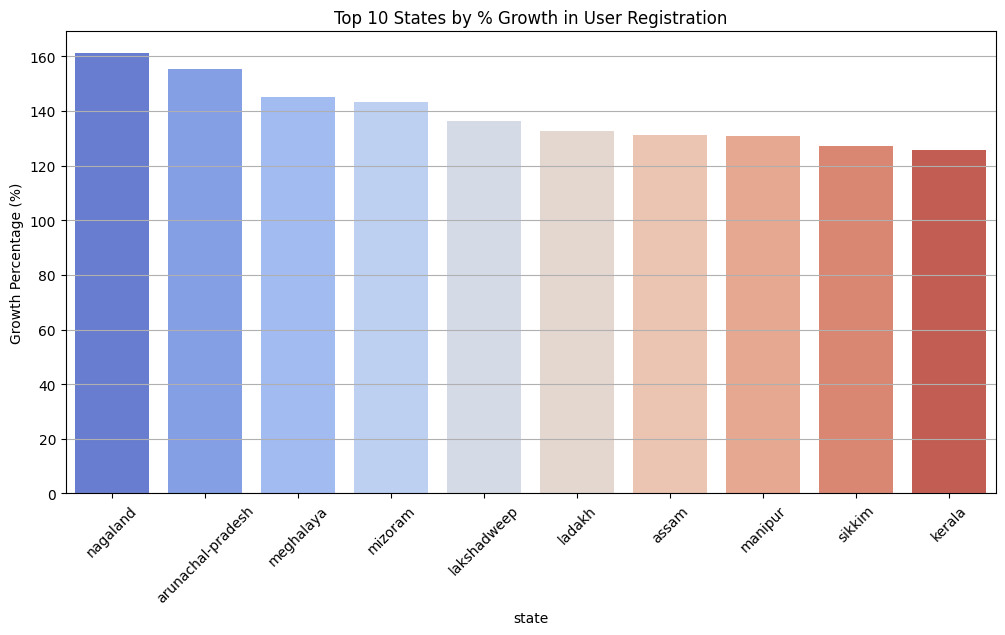

In [ ]:
# 🔹 Bar Chart: Top States by Growth Percentage

df_perc = df_result.sort_values(by='growth_percentage', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=df_perc, x='state', y='growth_percentage', palette='coolwarm')
plt.title('Top 10 States by % Growth in User Registration')
plt.ylabel('Growth Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


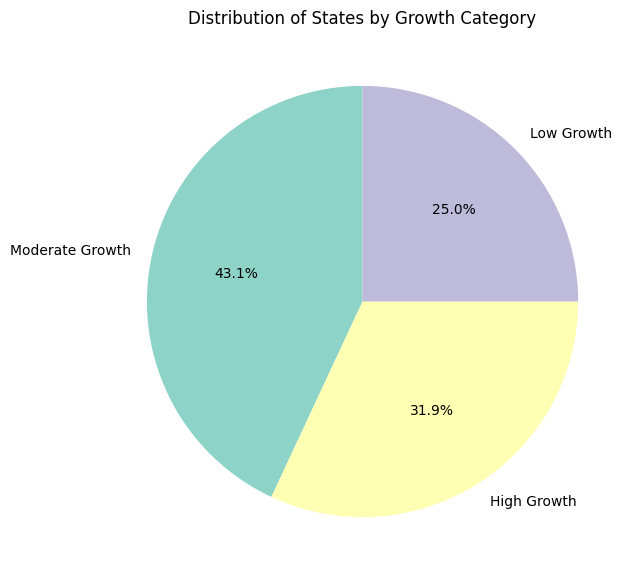

In [19]:
# 🔹 Pie Chart: Growth Category Distribution

plt.figure(figsize=(7,7))
df_result['growth_category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Distribution of States by Growth Category')
plt.ylabel('')
plt.show()


 Business Insight:

Metric | Insight

High absolute growth | States contributing large user numbers — focus on infrastructure or loyalty offers

High percentage growth | Emerging states — target with aggressive campaigns

Low/Negative growth | Stagnation — investigate reasons (e.g., saturation, competition)

Growth category | Segment states for tailored marketing (e.g., retention in low-growth vs. onboarding in high-growth)

In [8]:
def run_query(query):
    df = pd.read_sql(query, connection)
    print(tabulate(df, headers='keys', tablefmt='psql'))
    return df

# 🔹multi-dimensional cohort analysis of PhonePe user registration and engagement patterns across states, combining data from multiple tables

query = """
WITH registration_trends AS (
    -- Get registration data by state, year, quarter
    SELECT 
        mu.state,
        mu.year,
        mu.quarter,
        SUM(mu.registered_users) AS total_registrations,
        SUM(mu.app_opens) AS total_app_opens,
        COUNT(DISTINCT mu.district) AS active_districts
    FROM map_user mu
    GROUP BY mu.state, mu.year, mu.quarter
),
transaction_metrics AS (
    -- Get transaction data by state, year, quarter
    SELECT 
        mt.state,
        mt.year,
        mt.quarter,
        SUM(mt.transaction_count) AS total_transactions,
        SUM(mt.transaction_amount) AS total_amount,
        SUM(mt.transaction_count)/COUNT(DISTINCT mt.district) AS avg_transactions_per_district
    FROM map_transaction mt
    GROUP BY mt.state, mt.year, mt.quarter
),
device_distribution AS (
    -- Get device brand data
    SELECT 
        au.state,
        au.year,
        au.quarter,
        au.brand,
        SUM(au.device_count) AS total_devices,
        SUM(au.device_count*au.device_percentage)/SUM(au.device_count) AS weighted_percentage
    FROM aggregated_user au
    GROUP BY au.state, au.year, au.quarter, au.brand
),
dominant_brands AS (
    -- Find dominant brand per state/period
    SELECT 
        state,
        year,
        quarter,
        FIRST_VALUE(brand) OVER (
            PARTITION BY state, year, quarter 
            ORDER BY total_devices DESC
        ) AS top_brand,
        FIRST_VALUE(weighted_percentage) OVER (
            PARTITION BY state, year, quarter 
            ORDER BY total_devices DESC
        ) AS top_brand_percentage
    FROM device_distribution
),
insurance_adoption AS (
    -- Get insurance data where available
    SELECT
        mi.state,
        mi.year, 
        mi.quarter,
        SUM(mi.policy_count) AS total_policies,
        SUM(mi.insured_amount) AS total_insured_amount,
        COUNT(DISTINCT mi.district) AS districts_with_insurance
    FROM map_insurance mi
    GROUP BY mi.state, mi.year, mi.quarter
)
SELECT
    -- Basic identifiers
    rt.state,
    rt.year,
    rt.quarter,
    
    -- Registration metrics
    rt.total_registrations,
    rt.total_app_opens,
    rt.active_districts,
    ROUND(rt.total_app_opens/NULLIF(rt.total_registrations, 0), 2) AS app_opens_per_user,
    
    -- Transaction metrics
    tm.total_transactions,
    tm.total_amount,
    ROUND(tm.total_transactions/NULLIF(rt.total_registrations, 0), 2) AS transactions_per_user,
    tm.avg_transactions_per_district,
    
    -- Device metrics
    db.top_brand,
    ROUND(db.top_brand_percentage * 100, 1) AS top_brand_percentage,
    
    -- Insurance metrics
    ia.total_policies,
    ia.total_insured_amount,
    ROUND(ia.total_policies/NULLIF(rt.total_registrations, 0) * 1000, 2) AS policies_per_1000_users,
    
    -- Derived/calculated metrics
    CASE
        WHEN rt.total_registrations > 1000000 THEN 'Very High'
        WHEN rt.total_registrations > 500000 THEN 'High'
        WHEN rt.total_registrations > 100000 THEN 'Medium'
        ELSE 'Low'
    END AS registration_tier,
    
    CASE
        WHEN tm.total_transactions/NULLIF(rt.total_registrations, 0) > 5 THEN 'Highly Engaged'
        WHEN tm.total_transactions/NULLIF(rt.total_registrations, 0) > 2 THEN 'Moderately Engaged'
        WHEN tm.total_transactions/NULLIF(rt.total_registrations, 0) > 0 THEN 'Slightly Engaged'
        ELSE 'Not Engaged'
    END AS engagement_level,
    
    -- Market penetration metric (comparing districts with any activity vs districts with insurance)
    ROUND(ia.districts_with_insurance/NULLIF(rt.active_districts, 0) * 100, 1) AS insurance_district_coverage_percent
    
FROM registration_trends rt
LEFT JOIN transaction_metrics tm 
    ON rt.state = tm.state AND rt.year = tm.year AND rt.quarter = tm.quarter
LEFT JOIN (
    SELECT DISTINCT state, year, quarter, top_brand, top_brand_percentage
    FROM dominant_brands
) db 
    ON rt.state = db.state AND rt.year = db.year AND rt.quarter = db.quarter
LEFT JOIN insurance_adoption ia 
    ON rt.state = ia.state AND rt.year = ia.year AND rt.quarter = ia.quarter
WHERE rt.year BETWEEN 2018 AND 2024  -- Adjust years as needed
ORDER BY 
    rt.year DESC, 
    rt.quarter DESC, 
    rt.total_registrations DESC;
"""
df_result = run_query(query)

+------+------------------------------------+--------+-----------+-----------------------+-------------------+--------------------+----------------------+----------------------+----------------+-------------------------+---------------------------------+-------------+------------------------+------------------+------------------------+---------------------------+---------------------+--------------------+---------------------------------------+
|      | state                              |   year |   quarter |   total_registrations |   total_app_opens |   active_districts |   app_opens_per_user |   total_transactions |   total_amount |   transactions_per_user |   avg_transactions_per_district | top_brand   |   top_brand_percentage |   total_policies |   total_insured_amount |   policies_per_1000_users | registration_tier   | engagement_level   |   insurance_district_coverage_percent |
|------+------------------------------------+--------+-----------+-----------------------+------------

Purpose: Target marketing campaigns based on engagement levels in different states, Understand which device manufacturers to partner with in specific regions

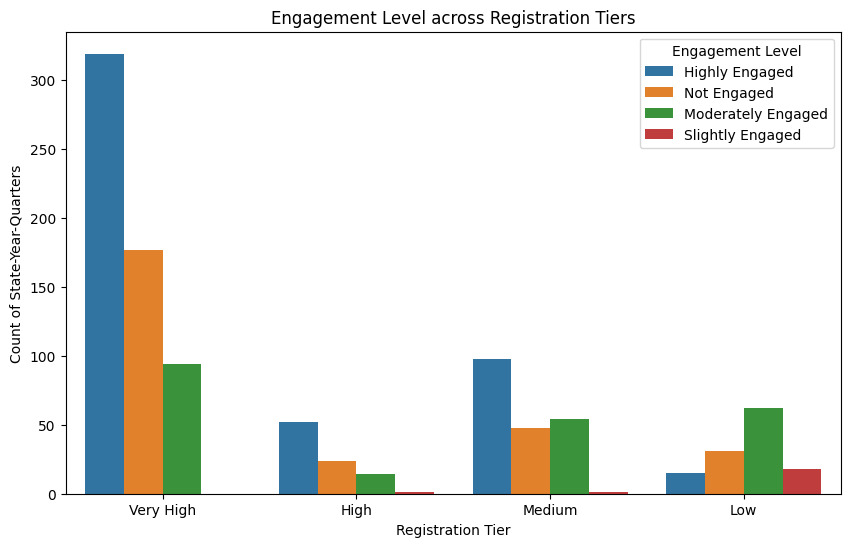

In [9]:
# 🔹 A. Registration Tier vs Engagement Level
plt.figure(figsize=(10, 6))
sns.countplot(data=df_result, x='registration_tier', hue='engagement_level')
plt.title('Engagement Level across Registration Tiers')
plt.xlabel('Registration Tier')
plt.ylabel('Count of State-Year-Quarters')
plt.legend(title='Engagement Level')
plt.show()


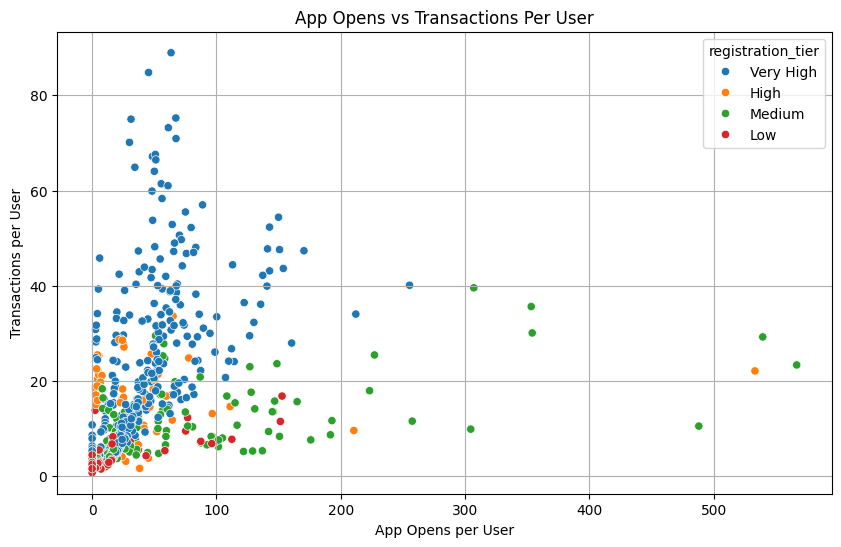

In [10]:
# 🔹 B. App Opens Per User vs Transactions Per User

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_result, x='app_opens_per_user', y='transactions_per_user', hue='registration_tier')
plt.title('App Opens vs Transactions Per User')
plt.xlabel('App Opens per User')
plt.ylabel('Transactions per User')
plt.grid(True)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_11164\1569869723.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states, x='policies_per_1000_users', y='state', palette='viridis')


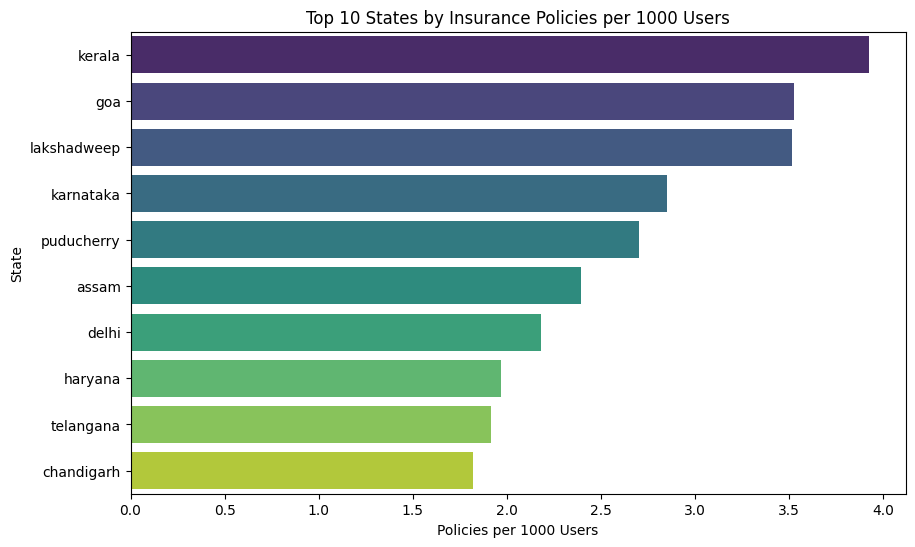

In [11]:
# 🔹 C. Policies per 1000 Users by State

top_states = df_result.groupby('state')['policies_per_1000_users'].mean().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_states, x='policies_per_1000_users', y='state', palette='viridis')
plt.title('Top 10 States by Insurance Policies per 1000 Users')
plt.xlabel('Policies per 1000 Users')
plt.ylabel('State')
plt.show()


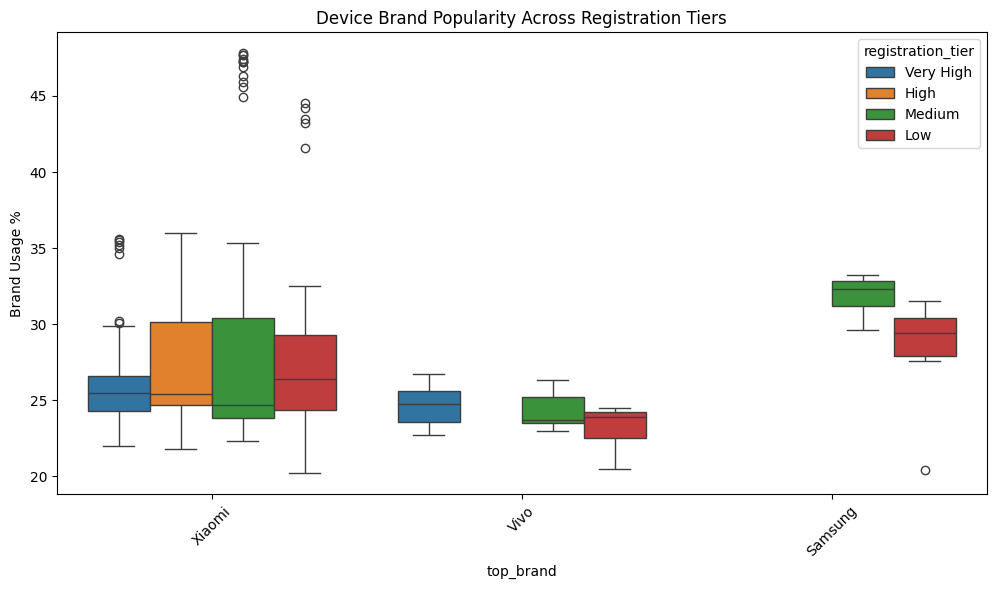

In [12]:
# 🔹 D. Top Brands by Registration Tier

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_result, x='top_brand', y='top_brand_percentage', hue='registration_tier')
plt.title('Device Brand Popularity Across Registration Tiers')
plt.ylabel('Brand Usage %')
plt.xticks(rotation=45)
plt.show()


In [20]:
cursor.close()
connection.close()


In [1]:
import requests
import json

# Fetch the GeoJSON data
geojson_url = "https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson"
response = requests.get(geojson_url)
geojson_data = response.json()

# Extract state names from the GeoJSON
state_names = [feature['properties']['ST_NM'] for feature in geojson_data['features']]
print("State names in GeoJSON:", state_names)

State names in GeoJSON: ['Arunachal Pradesh', 'Assam', 'Chandigarh', 'Karnataka', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Punjab', 'Rajasthan', 'Sikkim', 'Tripura', 'Uttarakhand', 'Telangana', 'Bihar', 'Kerala', 'Madhya Pradesh', 'Andaman & Nicobar', 'Gujarat', 'Lakshadweep', 'Odisha', 'Dadra and Nagar Haveli and Daman and Diu', 'Ladakh', 'Jammu & Kashmir', 'Chhattisgarh', 'Delhi', 'Goa', 'Haryana', 'Himachal Pradesh', 'Jharkhand', 'Tamil Nadu', 'Uttar Pradesh', 'West Bengal', 'Andhra Pradesh', 'Puducherry', 'Maharashtra']
